## Grupo 3


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import statsmodels.tsa.seasonal as tsa_seasonal

warnings.filterwarnings('ignore')

In [2]:
# Cargar data\raw\data_sample.parquet
df = pd.read_parquet('../data/raw/data_sample.parquet')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          74457 non-null  object 
 1   parsed_date               74457 non-null  object 
 2   transaction_id            74457 non-null  object 
 3   transaction_revenue_usd   36744 non-null  float64
 4   transaction_tax_usd       25581 non-null  float64
 5   transaction_shipping_usd  36580 non-null  float64
 6   transaction_affiliation   74457 non-null  object 
 7   currency_code             74457 non-null  object 
 8   product_sku               74457 non-null  object 
 9   product_name              74457 non-null  object 
 10  product_category          74457 non-null  object 
 11  product_brand             74457 non-null  object 
 12  product_variant           74457 non-null  object 
 13  product_quantity          36818 non-null  float64
 14  produc

transaction_date parsed_date   transaction_id  transaction_revenue_usd  \
0         20170801  2017-08-01  ORD201708011814                      NaN   
1         20170801  2017-08-01  ORD201708011814                    40.29   
2         20170801  2017-08-01  ORD201708011814                      NaN   
3         20170801  2017-08-01  ORD201708011814                    40.29   
4         20170801  2017-08-01  ORD201708011814                      NaN   

   transaction_tax_usd  transaction_shipping_usd   transaction_affiliation  \
0                  NaN                       NaN  Google Merchandise Store   
1                 8.82                      11.0  Google Merchandise Store   
2                  NaN                       NaN  Google Merchandise Store   
3                 8.82                      11.0  Google Merchandise Store   
4                  NaN                       NaN  Google Merchandise Store   

  currency_code     product_sku                               product_name  \
0           USD  GGOEGAEJ028013  Google Women's Short Sleeve Hero Tee Grey   
1           USD  GGOEGAEJ028013  Google Women's Short Sleeve Hero Tee Grey   
2           USD  GGOEGALB034113      Google Women's Vintage Hero Tee Black   
3           USD  GGOEGALB034113      Google Women's Vintage Hero Tee Black   
4           USD  GGOEGOCB017499                        Leatherette Journal   

   ... is_interaction is_entrance is_exit  referer             page_path  \
0  ...           True        None    True     None  /ordercompleted.html   
1  ...           True        None    None     None  /ordercompleted.html   
2  ...           True        None    True     None  /ordercompleted.html   
3  ...           True        None    None     None  /ordercompleted.html   
4  ...           True        None    True     None  /ordercompleted.html   

                          hostname             page_title entrance_page_path  \
0  shop.googlemerchandisestore.com  Checkout Confirmation               None   
1  shop.googlemerchandisestore.com  Checkout Confirmation               None   
2  shop.googlemerchandisestore.com  Checkout Confirmation               None   
3  shop.googlemerchandisestore.com  Checkout Confirmation               None   
4  shop.googlemerchandisestore.com  Checkout Confirmation               None   

         exit_page_path social_engagement_type  
0  /ordercompleted.html   Not Socially Engaged  
1  /ordercompleted.html   Not Socially Engaged  
2  /ordercompleted.html   Not Socially Engaged  
3  /ordercompleted.html   Not Socially Engaged  
4  /ordercompleted.html   Not Socially Engaged  

[5 rows x 77 columns]

In [3]:
# Convertir la columna 'transaction_date' a tipo datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          74457 non-null  datetime64[ns]
 1   parsed_date               74457 non-null  object        
 2   transaction_id            74457 non-null  object        
 3   transaction_revenue_usd   36744 non-null  float64       
 4   transaction_tax_usd       25581 non-null  float64       
 5   transaction_shipping_usd  36580 non-null  float64       
 6   transaction_affiliation   74457 non-null  object        
 7   currency_code             74457 non-null  object        
 8   product_sku               74457 non-null  object        
 9   product_name              74457 non-null  object        
 10  product_category          74457 non-null  object        
 11  product_brand             74457 non-null  object        
 12  product_variant   

In [5]:
# Mostrar la cantidad de valores nulos en las columnas 'product_category' y 'product_quantity'
print(df['product_category'].isnull().sum())
print(df['product_quantity'].isnull().sum())

0
37639


In [6]:
# Eliminar filas con valores nulos en 'product_quantity'
df = df.dropna(subset=['product_quantity'])

In [7]:
# Mostrar la cantidad de valores nulos en las columnas 'product_category' y 'product_quantity'
print(df['product_category'].isnull().sum())
print(df['product_quantity'].isnull().sum())

0
0


In [8]:
# Mostrar los valores de product_category
df["product_category"].value_counts()

product_category
Apparel                               12972
(not set)                              8110
Office                                 5490
Drinkware                              2913
Lifestyle                              2198
Bags                                   1476
Electronics                            1172
Headgear                                594
Notebooks & Journals                    353
Waze                                    279
${productitem.product.origCatName}      278
Bottles                                 207
Gift Cards                              153
Accessories                             148
Housewares                               98
Backpacks                                97
Google                                   95
Fun                                      75
More Bags                                75
Android                                  29
Tumblers                                  6
Name: count, dtype: int64

In [9]:
# Remover todas las filas cuyo 'product_category' es '(not set)'
df = df[df['product_category'] != '(not set)']
df = df[df['product_category'] != '${productitem.product.origCatName}']


In [10]:
# Convertir la columna 'product_quantity' a tipo categórica
df['product_category'] = df['product_category'].astype('category')
# Mostrar la nueva forma del DataFrame
df.shape

(28430, 77)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28430 entries, 1 to 58066
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          28430 non-null  datetime64[ns]
 1   parsed_date               28430 non-null  object        
 2   transaction_id            28430 non-null  object        
 3   transaction_revenue_usd   28430 non-null  float64       
 4   transaction_tax_usd       19686 non-null  float64       
 5   transaction_shipping_usd  28273 non-null  float64       
 6   transaction_affiliation   28430 non-null  object        
 7   currency_code             28430 non-null  object        
 8   product_sku               28430 non-null  object        
 9   product_name              28430 non-null  object        
 10  product_category          28430 non-null  category      
 11  product_brand             28430 non-null  object        
 12  product_variant        

In [12]:
# Agrupar por 'transaction_date' y 'product_category', sumando 'product_quantity'
df = df.groupby(['transaction_date', 'product_category'], as_index=False)['product_quantity'].sum()

# Crear el folder si no existe
import os
if not os.path.exists('../data/aggregated'):
    os.makedirs('../data/aggregated')

# Guardar el DataFrame agrupado en un archivo Parquet
df.to_parquet('../data/aggregated/day_category.parquet', index=False)
df.head()

# Cargar el archivo Parquet para verificar
df = pd.read_parquet('../data/aggregated/day_category.parquet')


# NOTA: Este codigo tambien se puede encontar en src\preprocess\aggregation.py (como fue indicado por el profesor)

In [13]:
df.dtypes

transaction_date    datetime64[ns]
product_category          category
product_quantity           float64
dtype: object

📊 RESUMEN INICIAL:
Rango de fechas: 2016-10-13 00:00:00 a 2017-08-01 00:00:00
Total de días únicos: 293
Total de transacciones: 5567

Categorías disponibles:
product_category
Accessories             293
Android                 293
Apparel                 293
Backpacks               293
Bags                    293
Bottles                 293
Drinkware               293
Electronics             293
Fun                     293
Gift Cards              293
Google                  293
Headgear                293
Housewares              293
Lifestyle               293
More Bags               293
Notebooks & Journals    293
Office                  293
Tumblers                293
Waze                    293
Name: count, dtype: int64

--- ANÁLISIS DE ACTIVIDAD ---
Accessories          | Días activos: 293 | Rango: 293 días | Actividad: 100.0% | Transacciones: 293
Android              | Días activos: 293 | Rango: 293 días | Actividad: 100.0% | Transacciones: 293
Apparel              | Días activos:

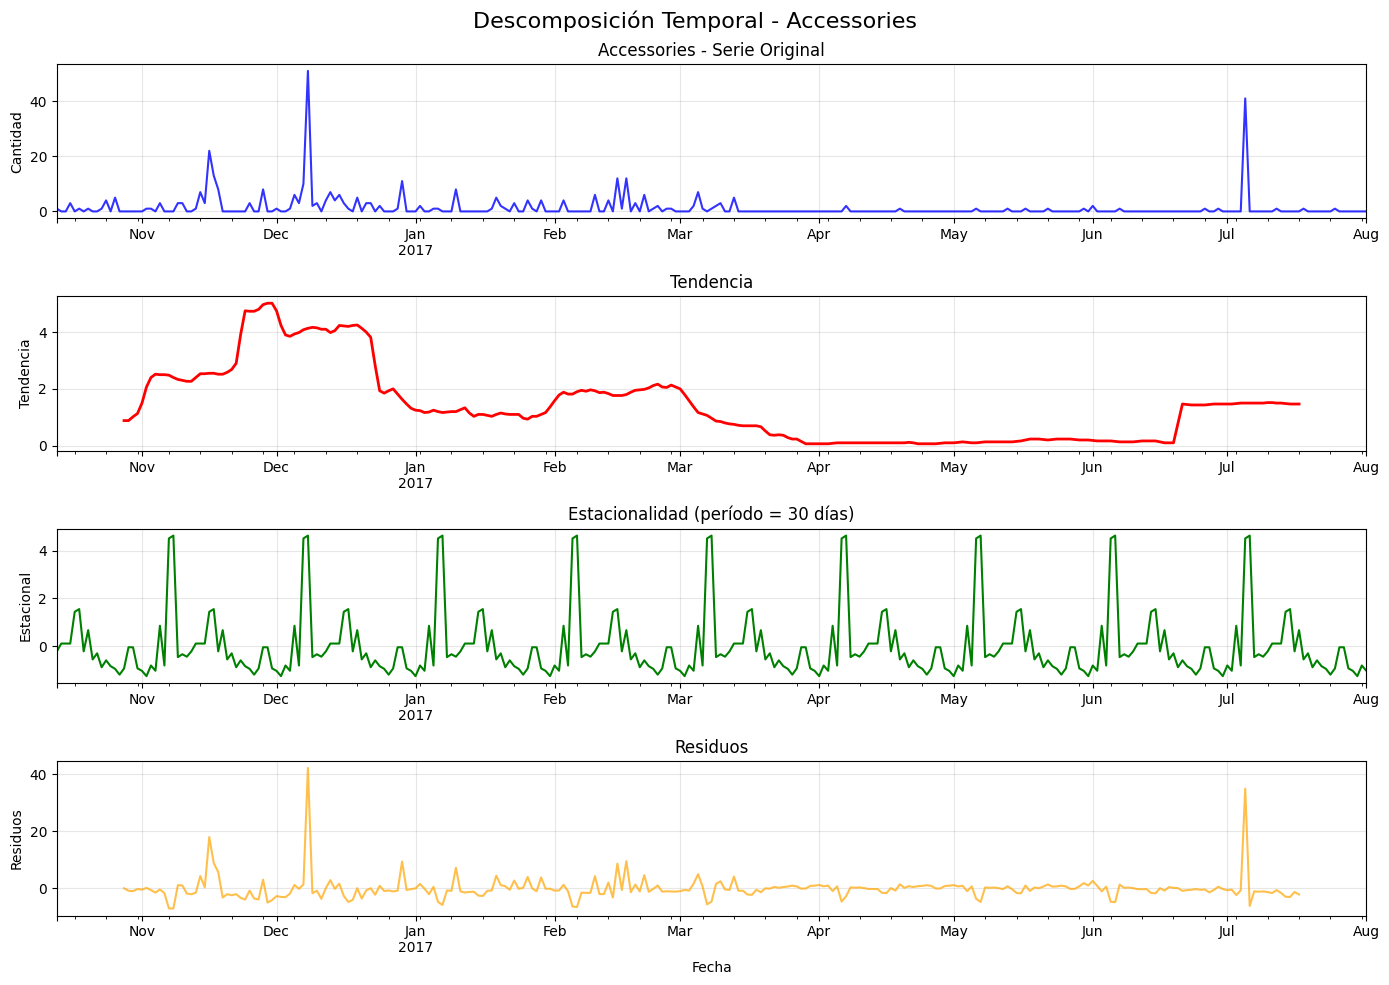

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 5.9 unidades

🔄 Procesando: Android
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 24 | Días sin ventas: 269


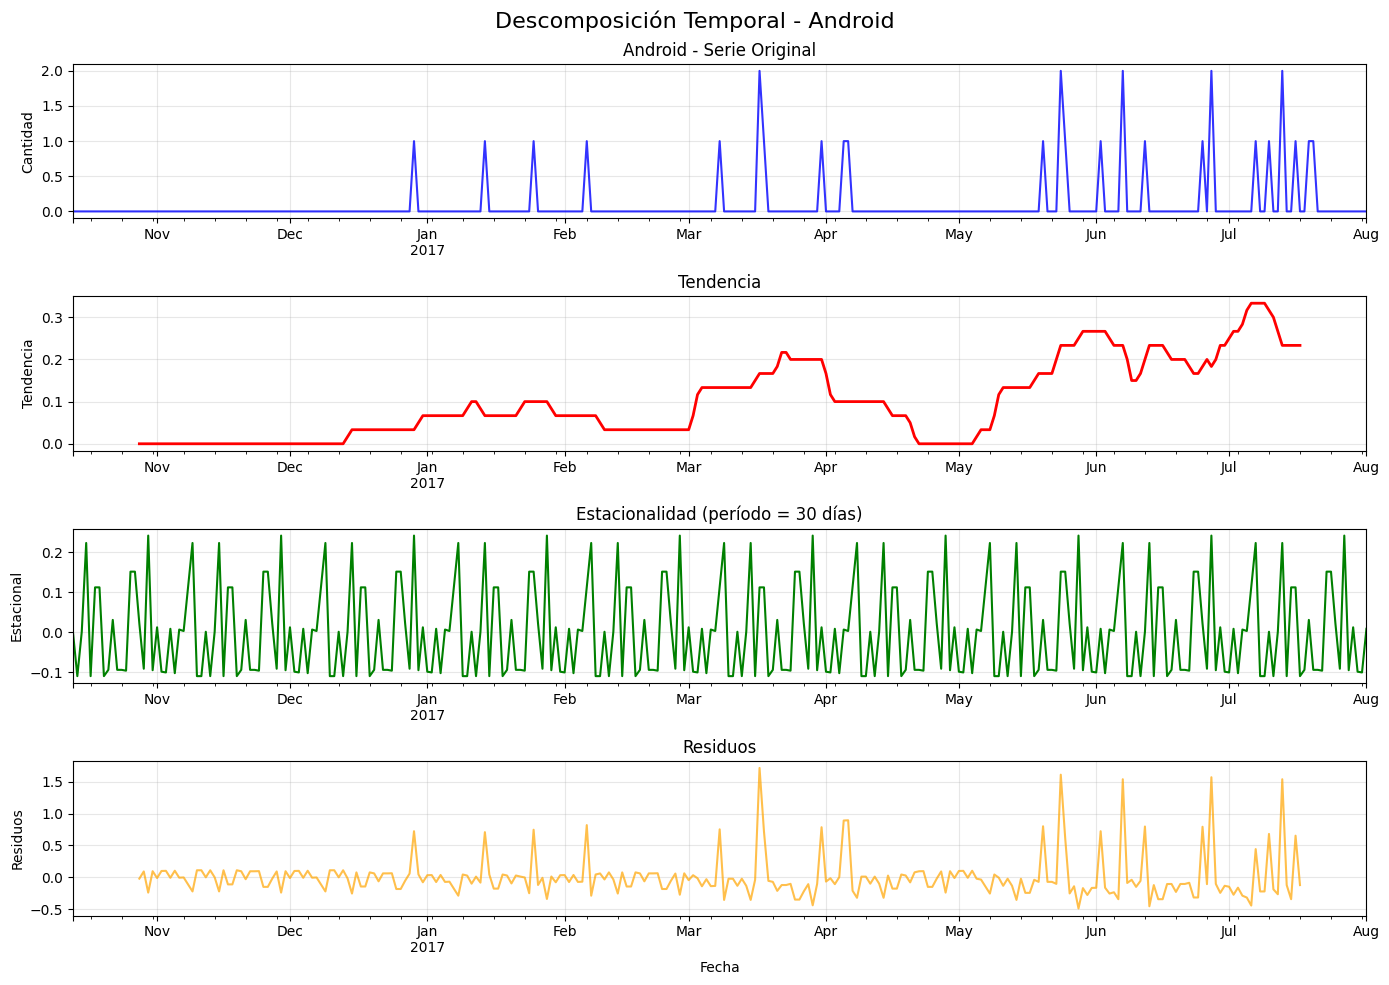

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 0.4 unidades

🔄 Procesando: Apparel
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 293 | Días sin ventas: 0


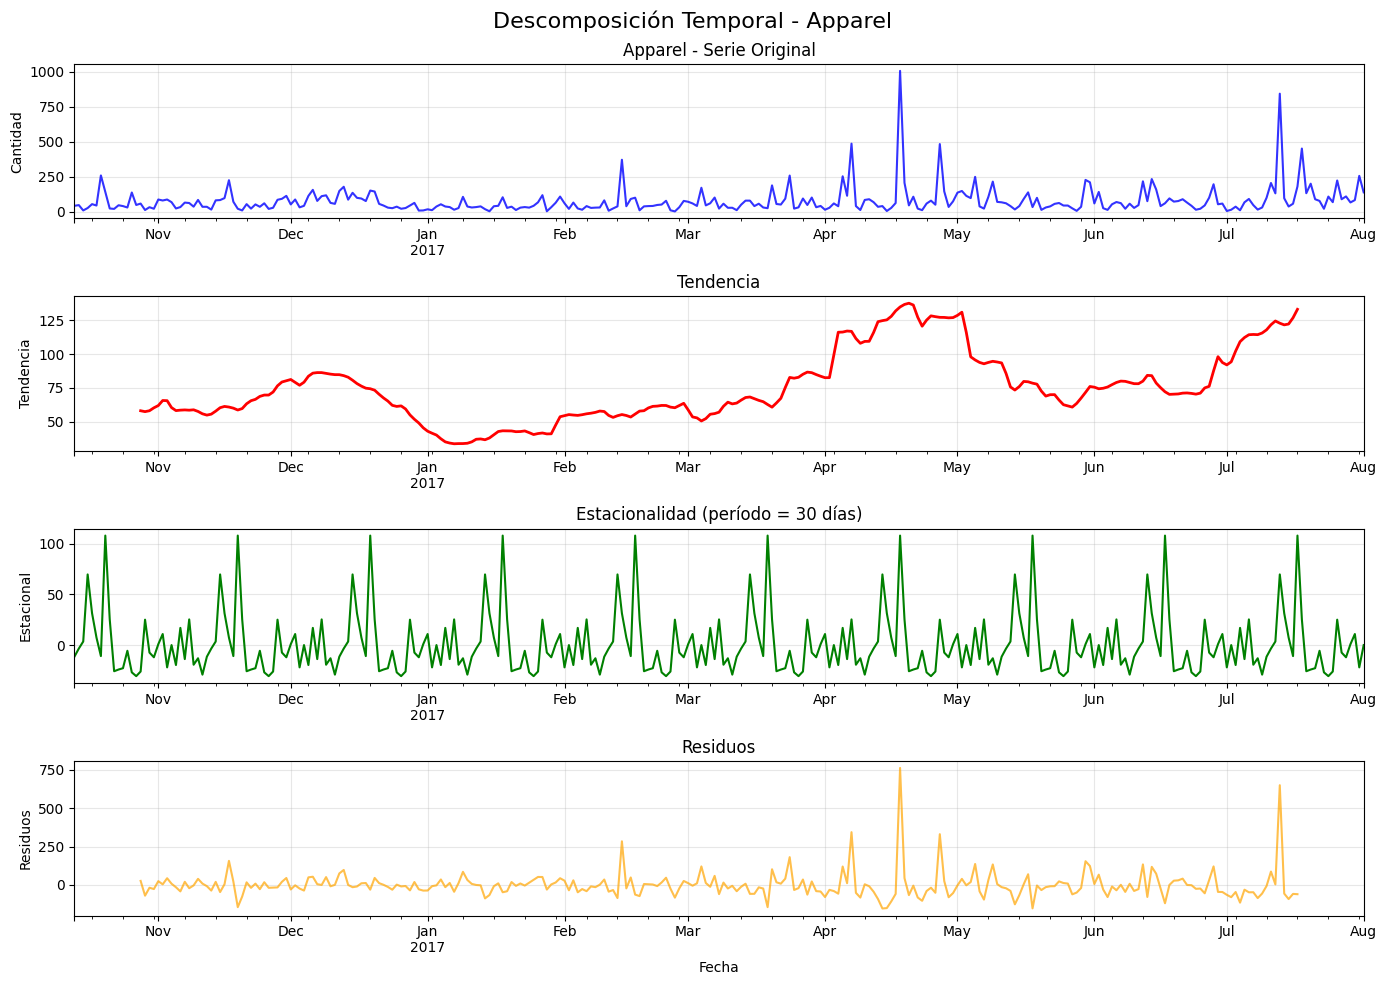

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 138.4 unidades

🔄 Procesando: Backpacks
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 75 | Días sin ventas: 218


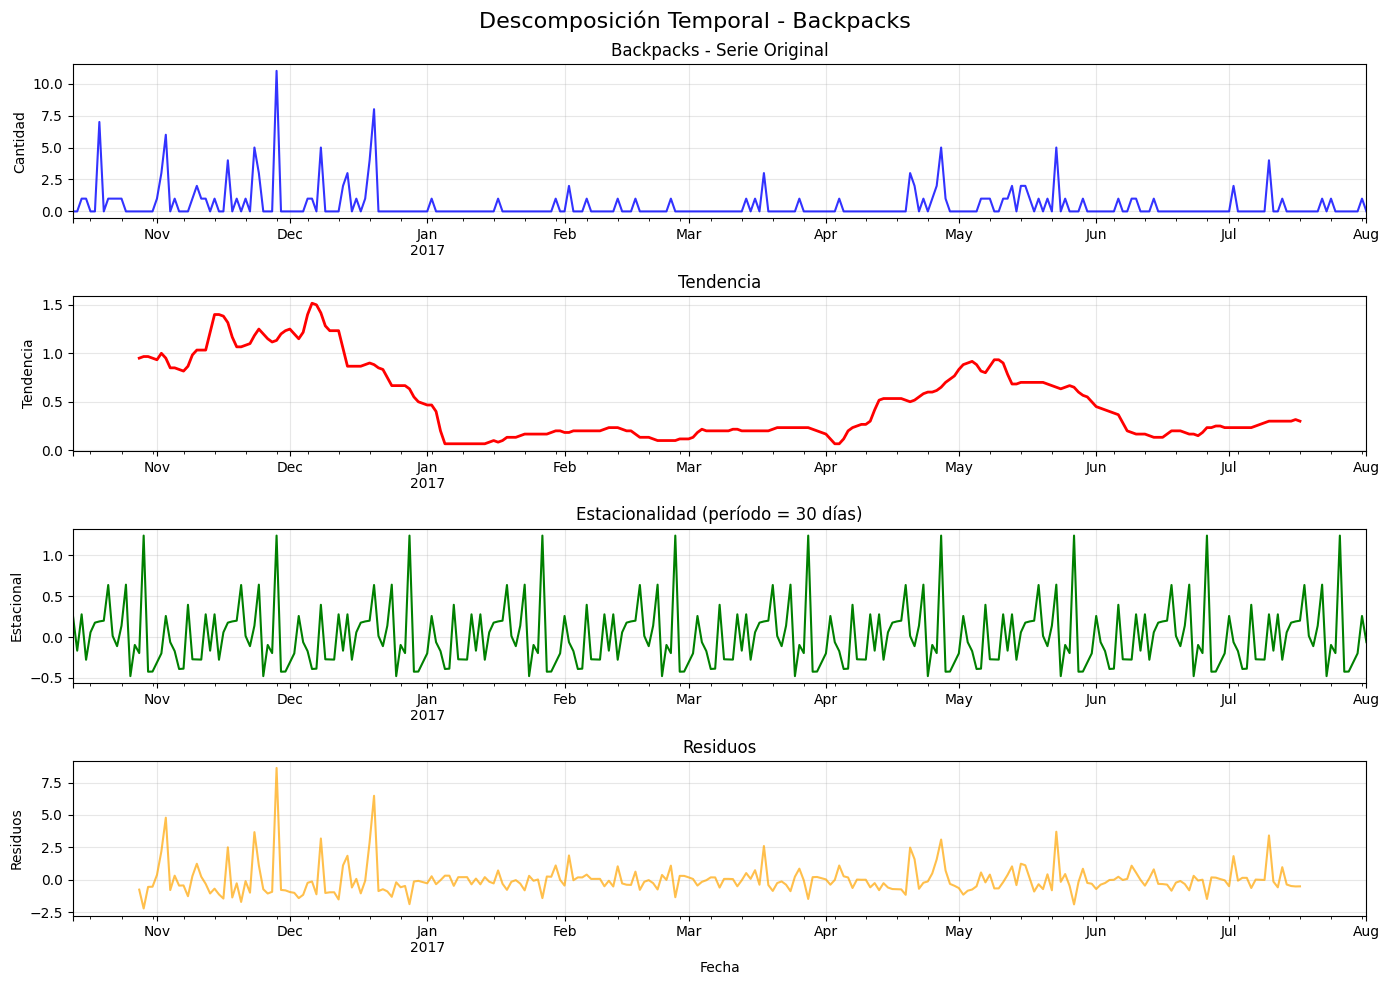

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 1.7 unidades

🔄 Procesando: Bags
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 275 | Días sin ventas: 18


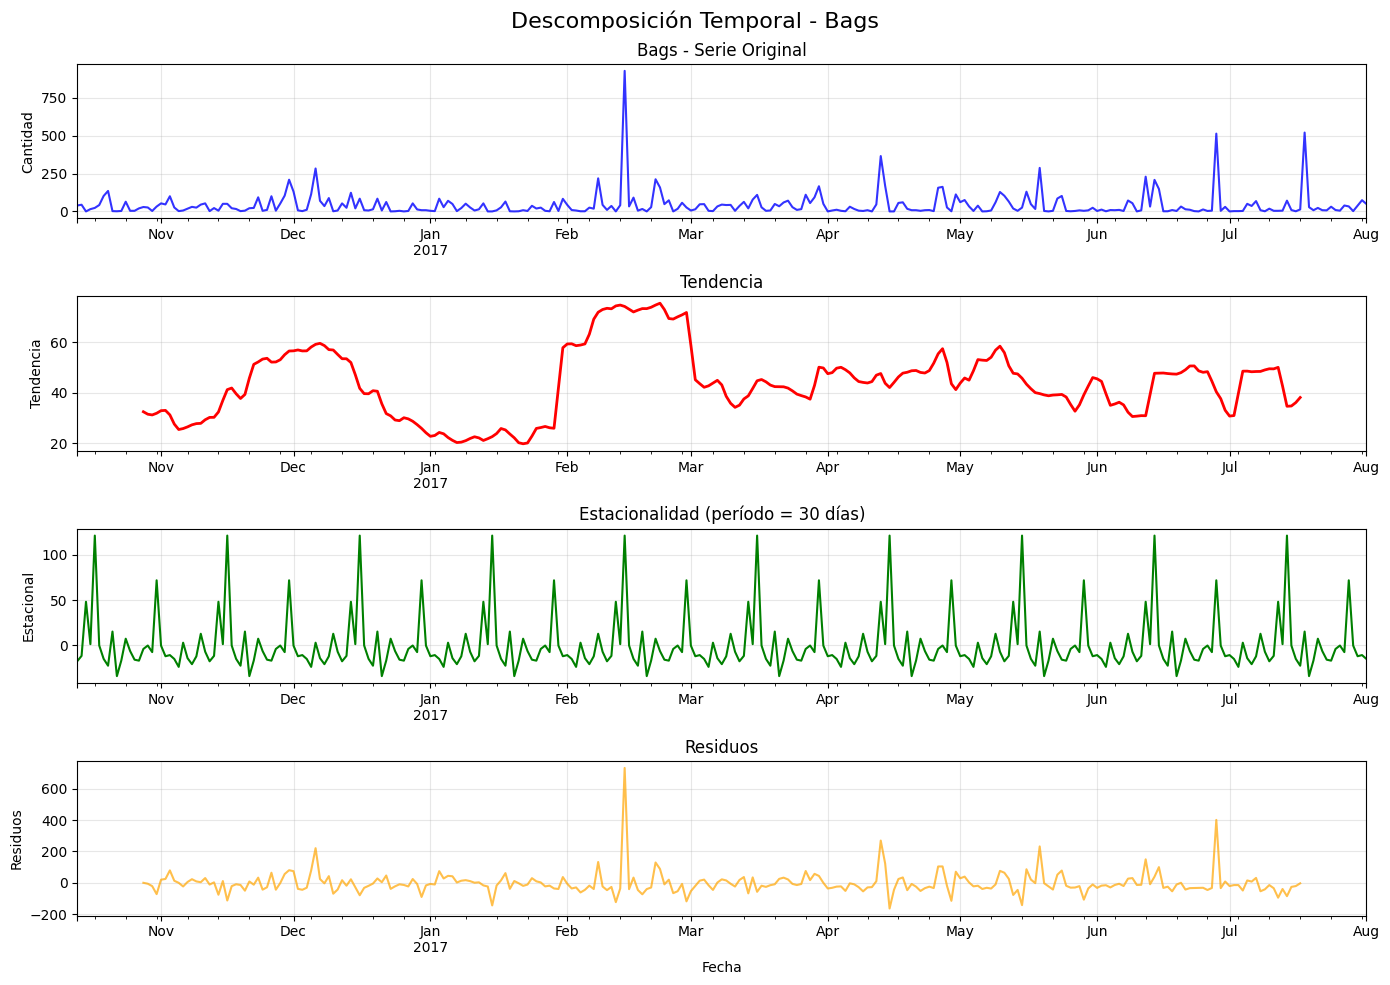

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 154.9 unidades

🔄 Procesando: Bottles
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 135 | Días sin ventas: 158


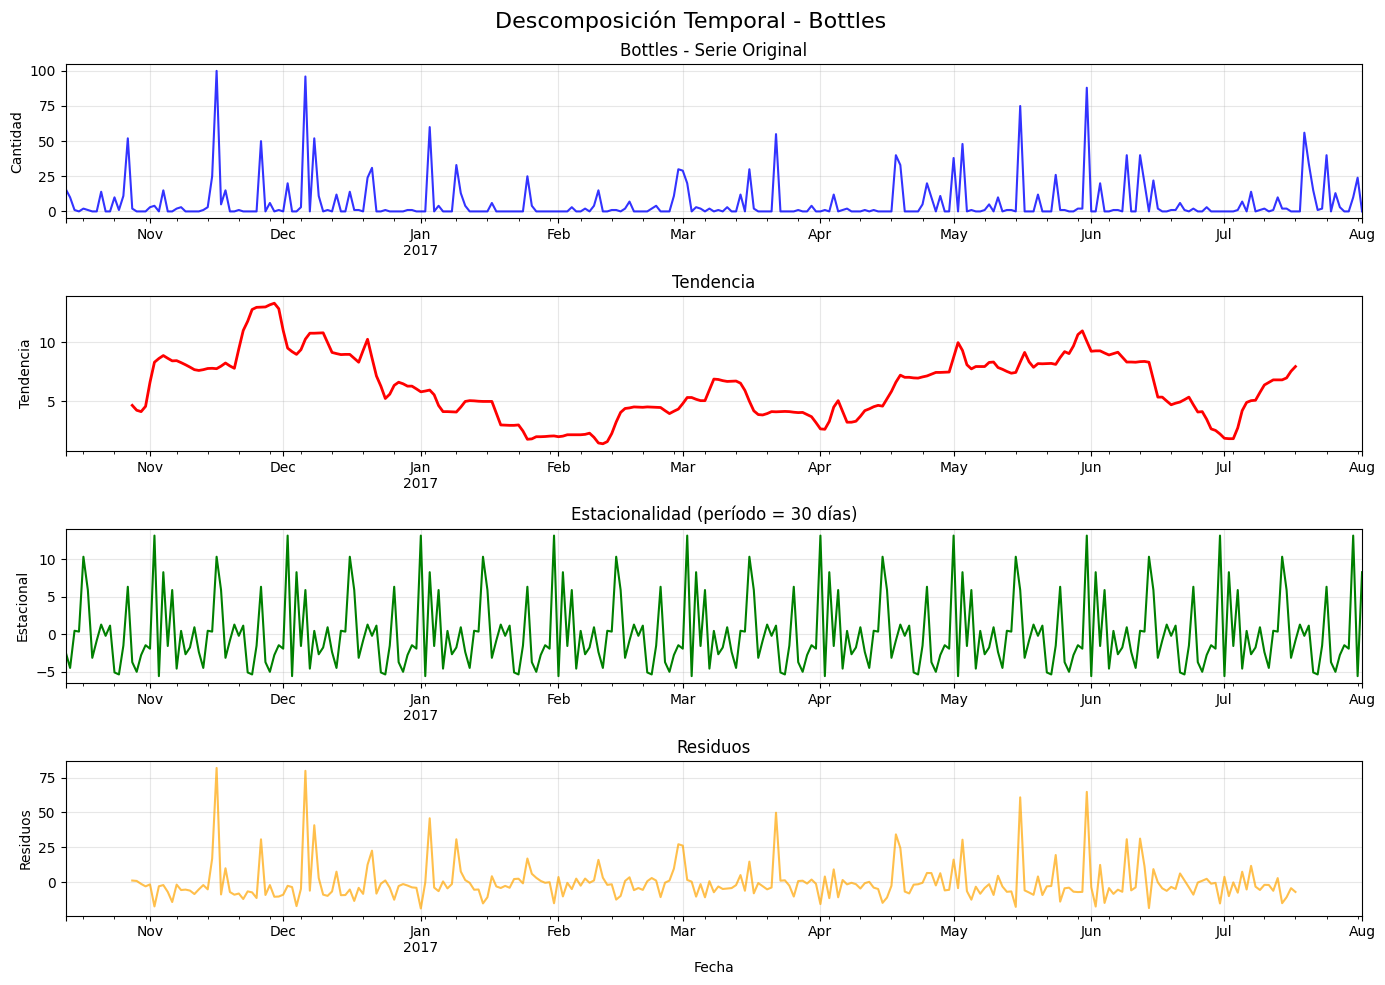

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 18.8 unidades

🔄 Procesando: Drinkware
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 288 | Días sin ventas: 5


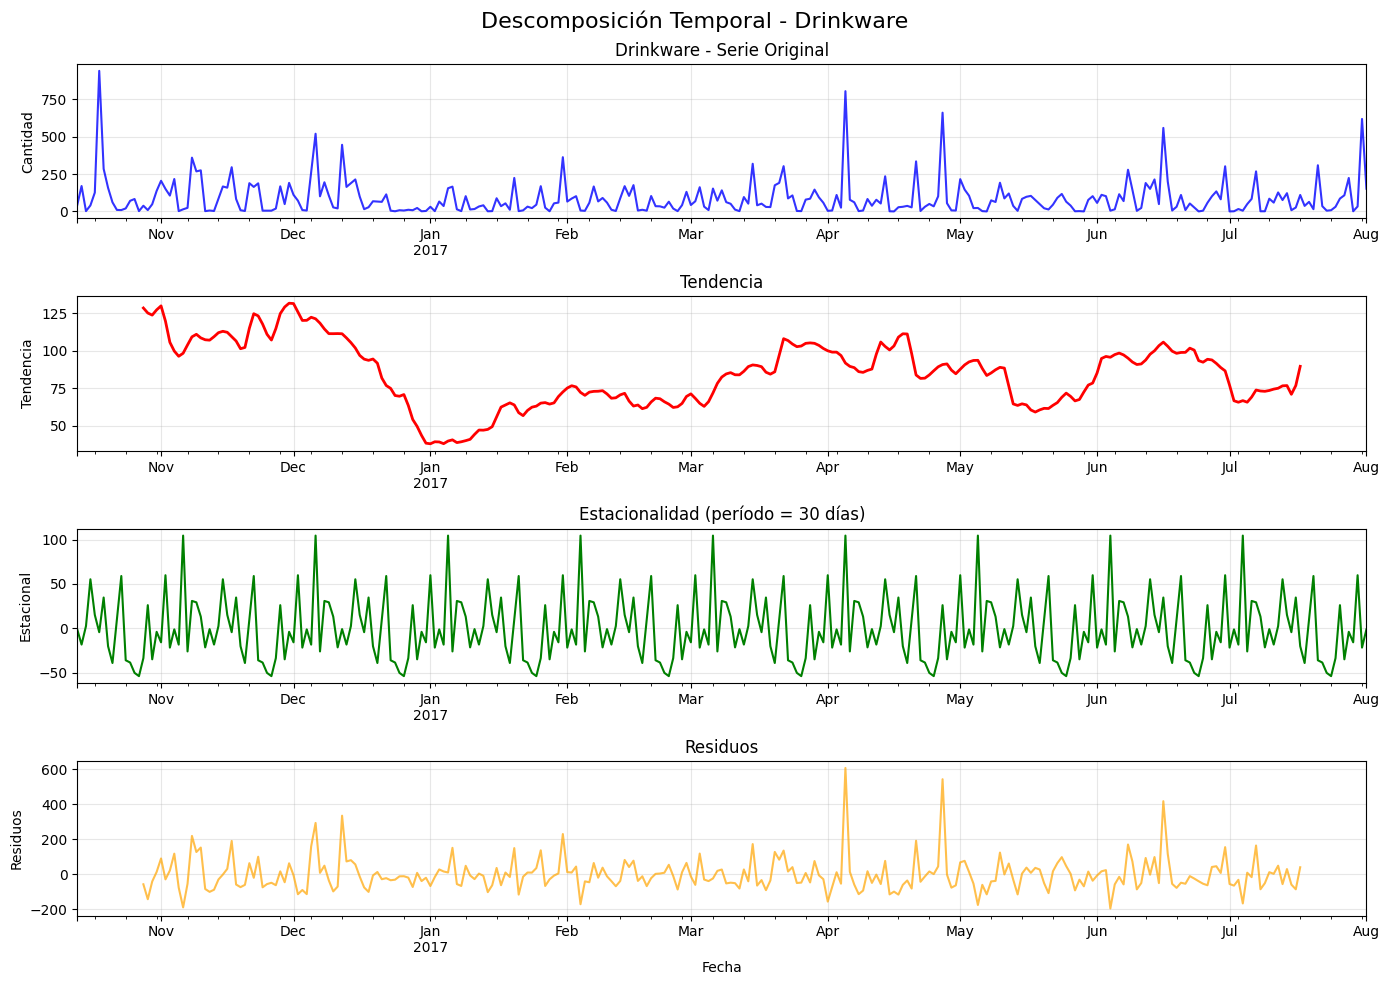

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 158.7 unidades

🔄 Procesando: Electronics
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 262 | Días sin ventas: 31


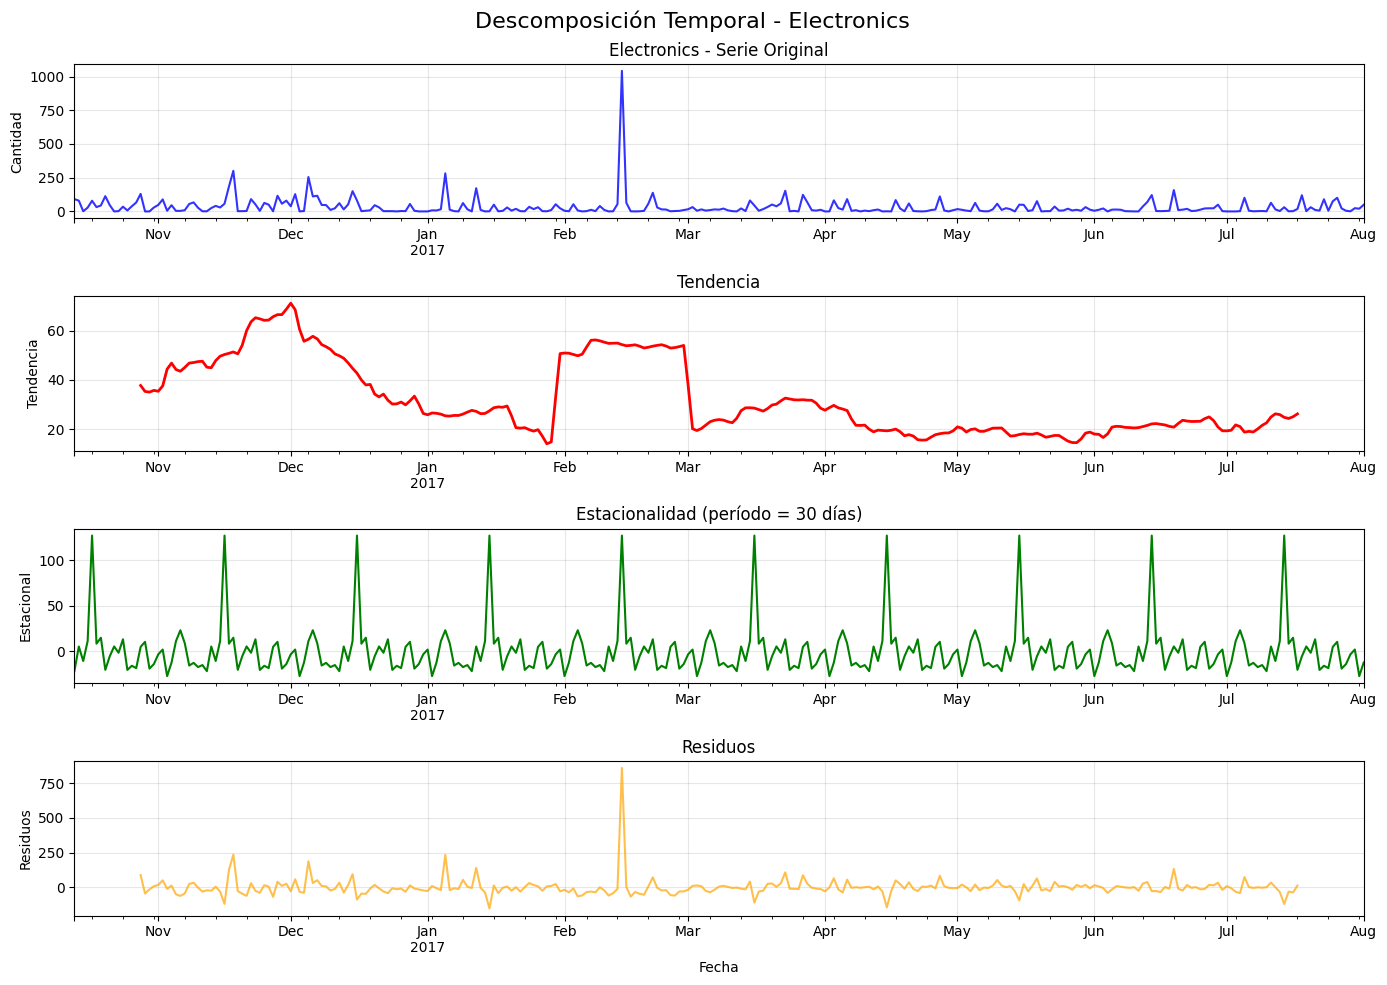

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 154.3 unidades

🔄 Procesando: Fun
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 55 | Días sin ventas: 238


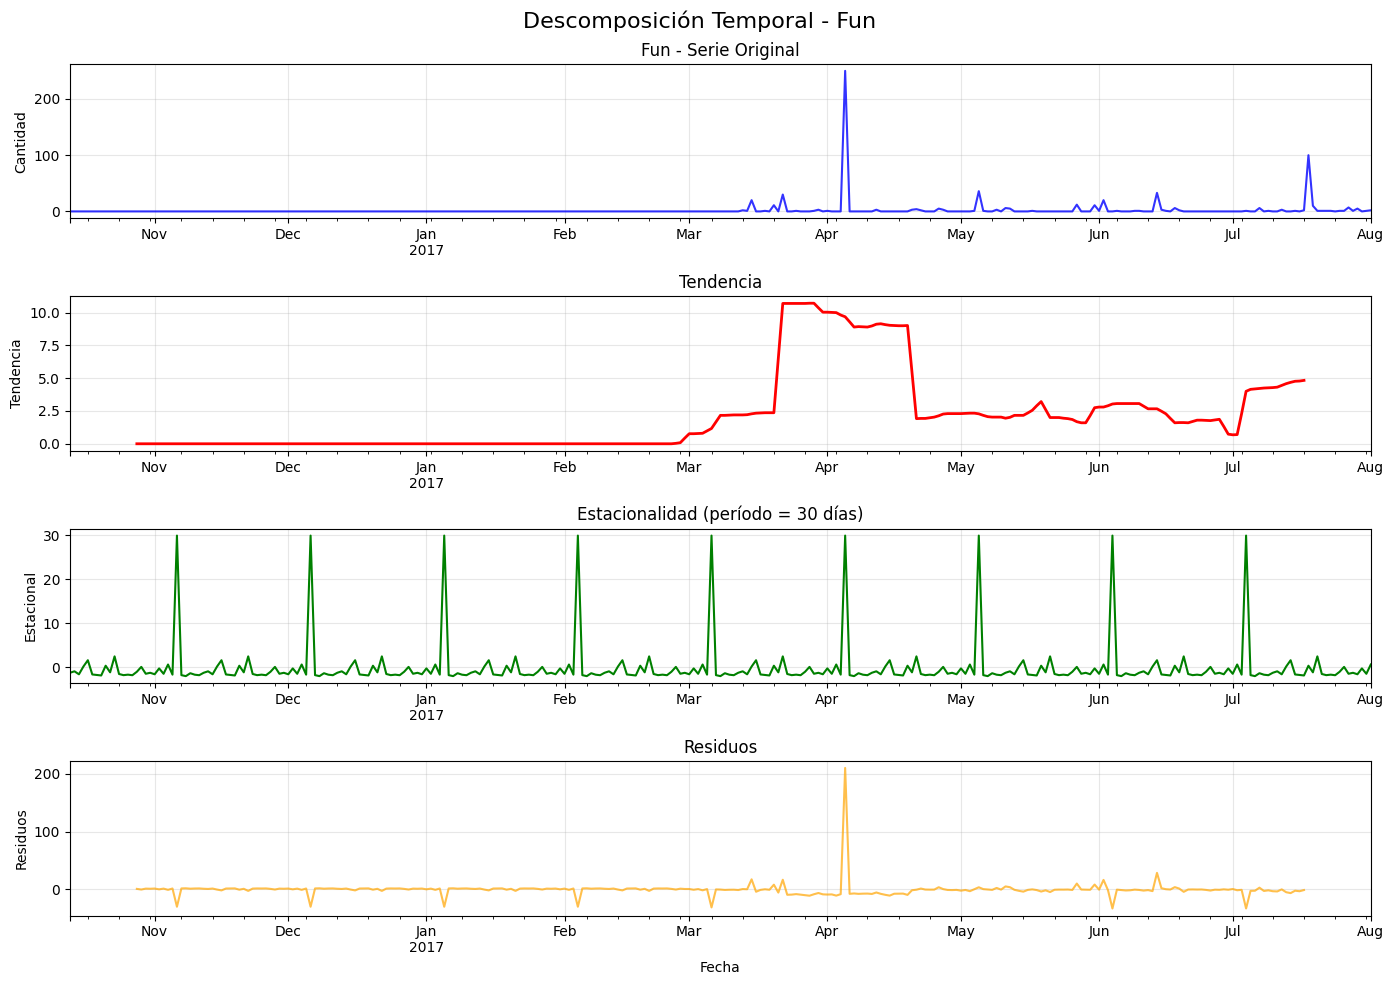

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 31.9 unidades

🔄 Procesando: Gift Cards
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 52 | Días sin ventas: 241


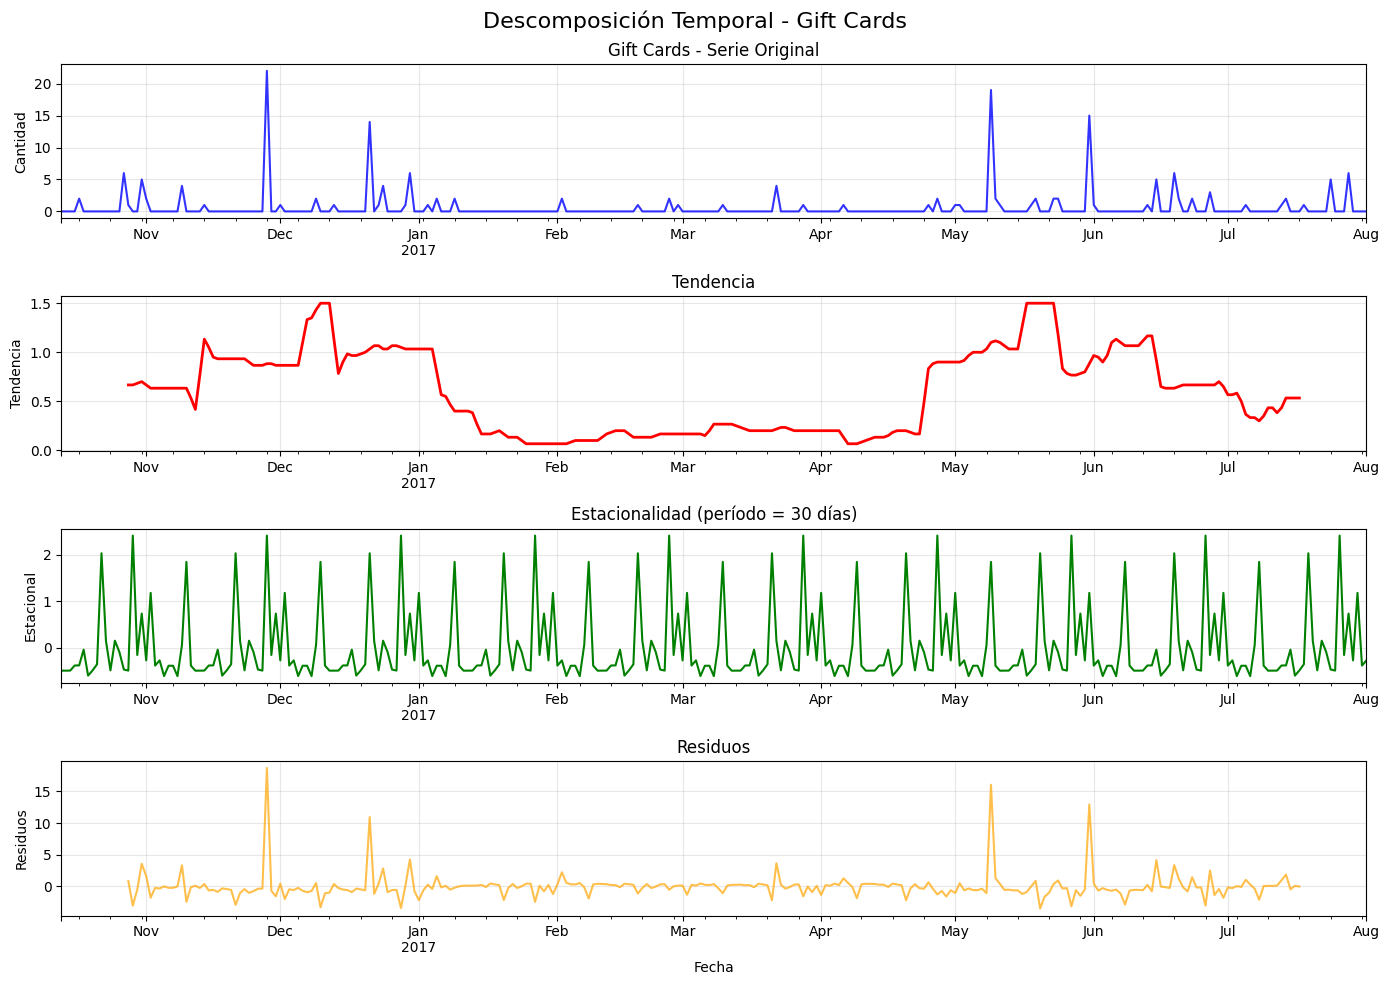

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 3.0 unidades

🔄 Procesando: Google
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 76 | Días sin ventas: 217


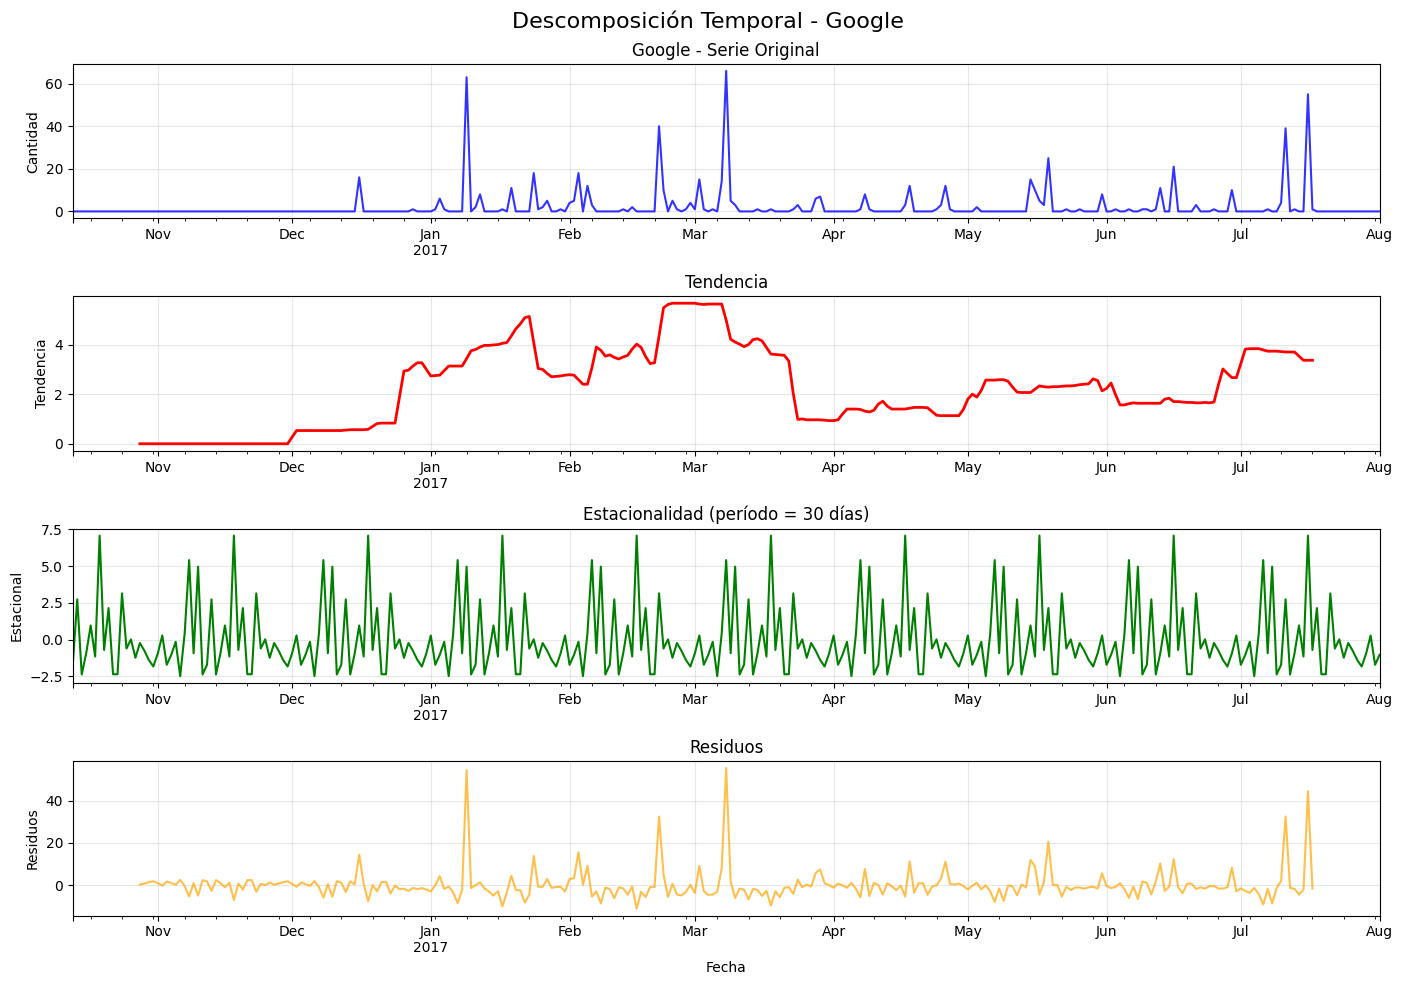

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 9.6 unidades

🔄 Procesando: Headgear
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 223 | Días sin ventas: 70


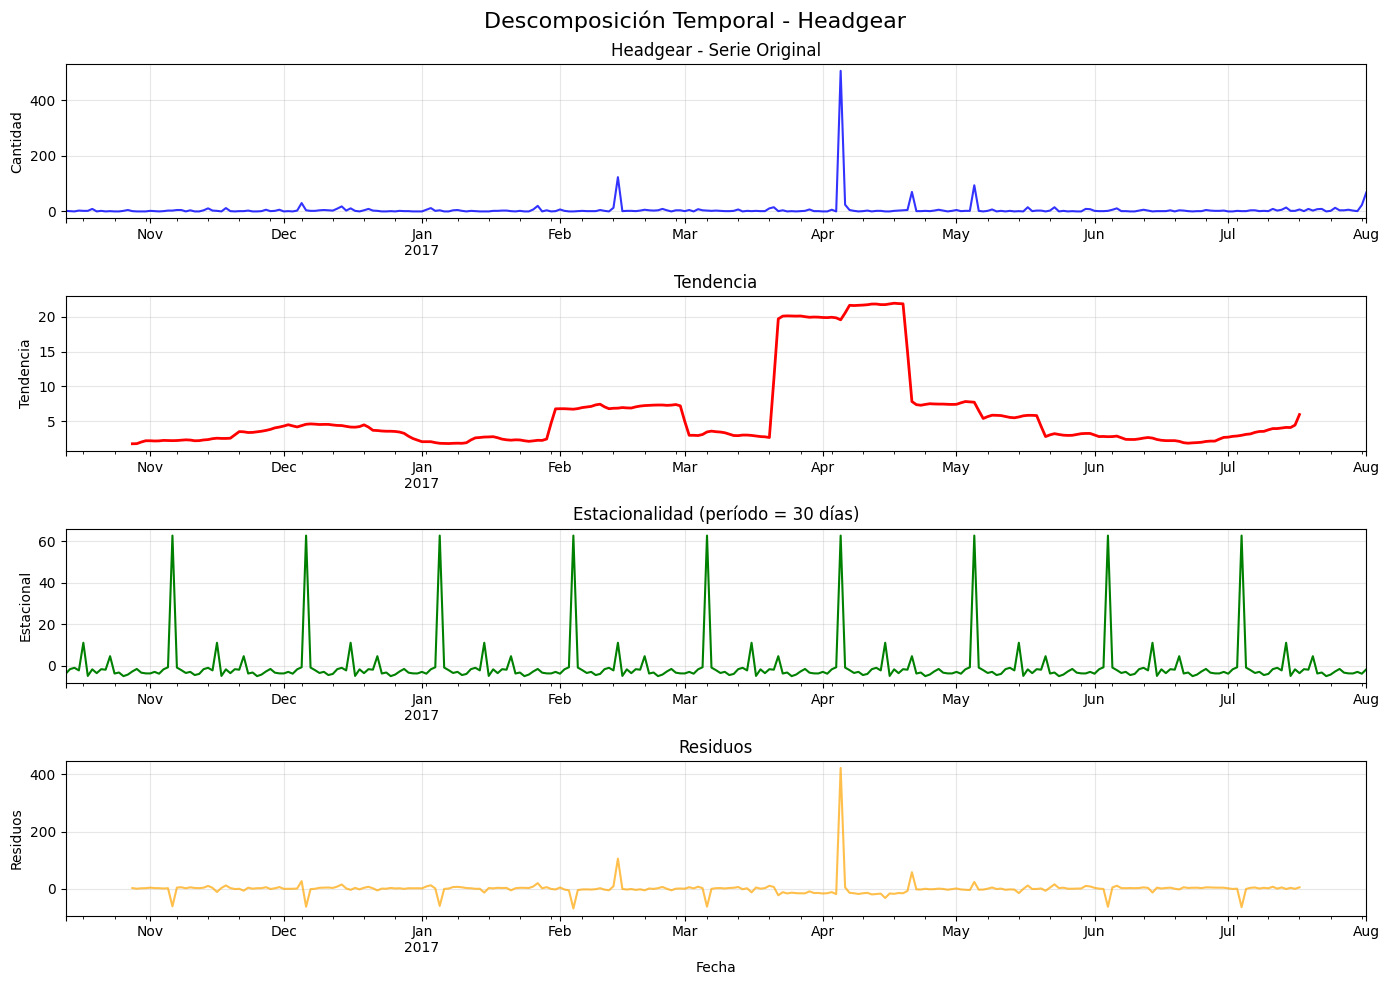

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 67.8 unidades

🔄 Procesando: Housewares
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 79 | Días sin ventas: 214


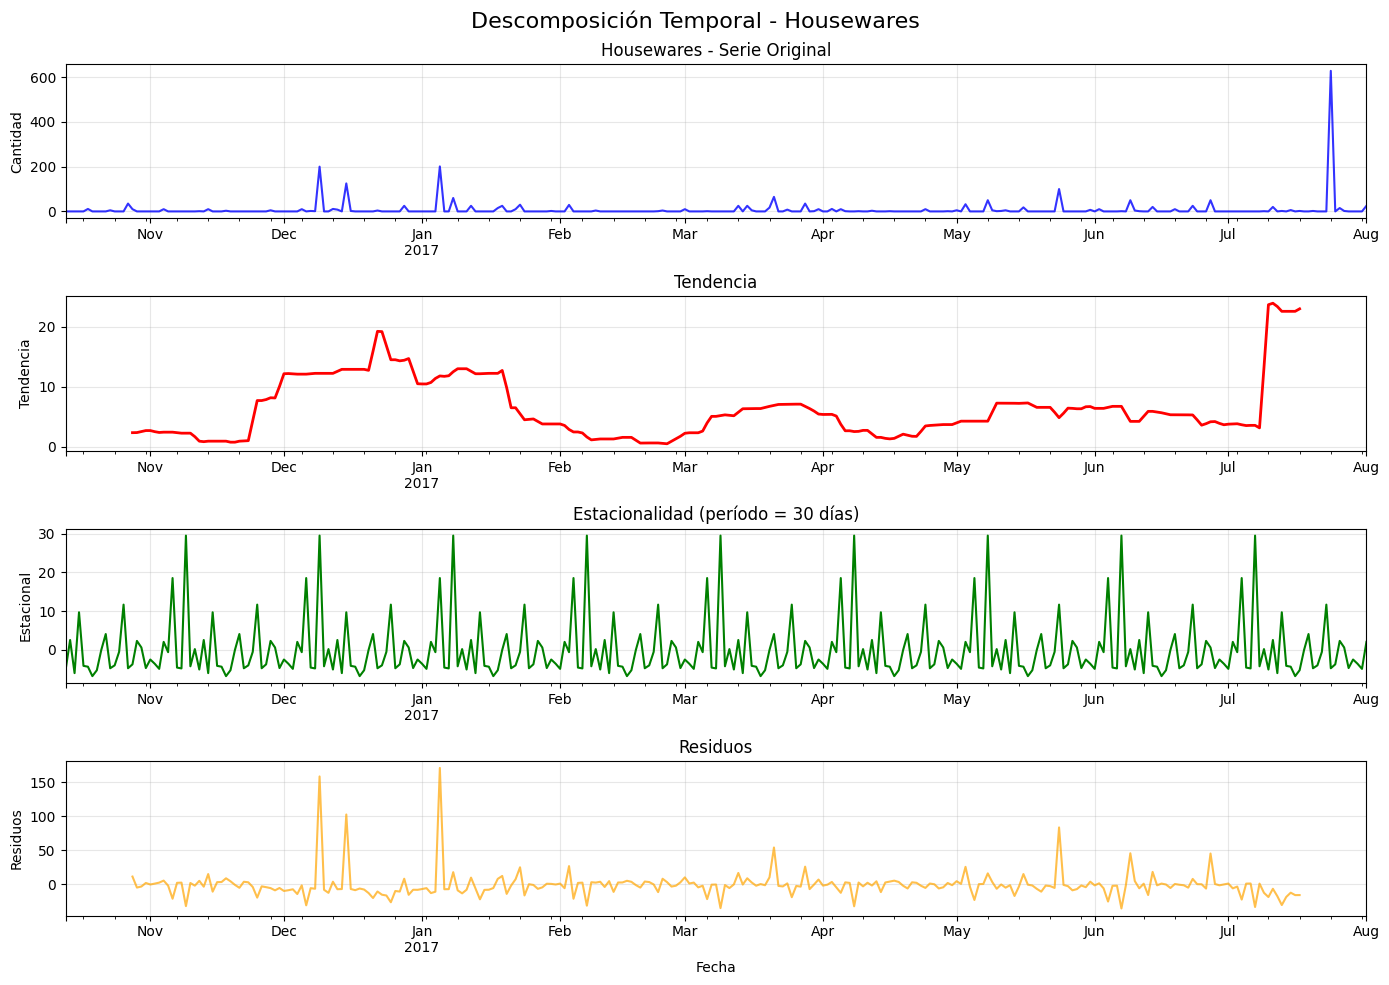

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 36.4 unidades

🔄 Procesando: Lifestyle
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 273 | Días sin ventas: 20


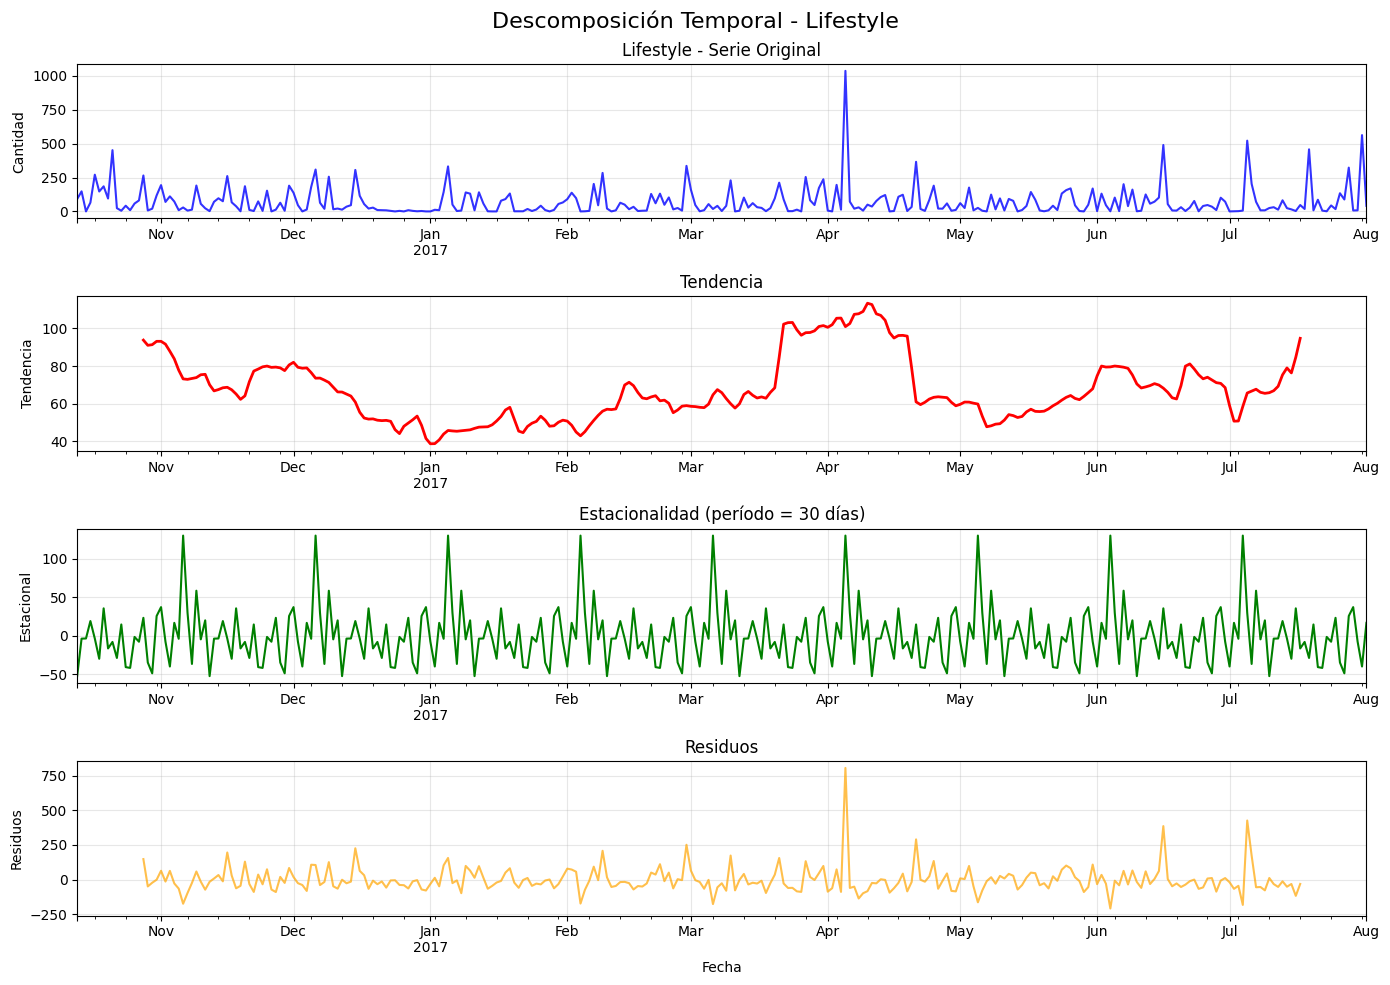

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 182.4 unidades

🔄 Procesando: More Bags
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 52 | Días sin ventas: 241


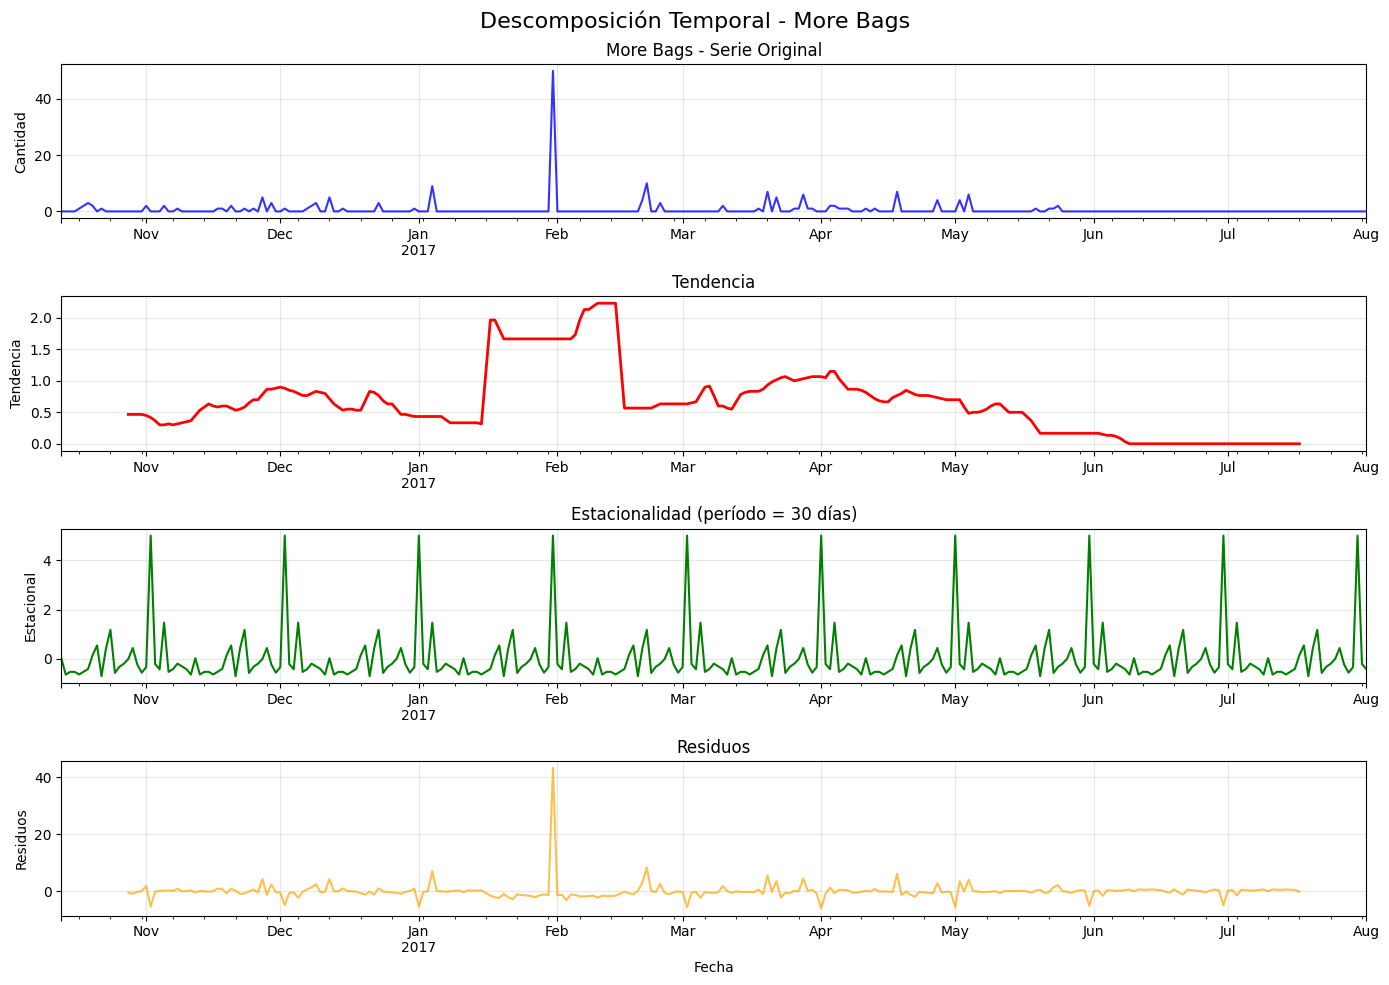

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 5.7 unidades

🔄 Procesando: Notebooks & Journals
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 136 | Días sin ventas: 157


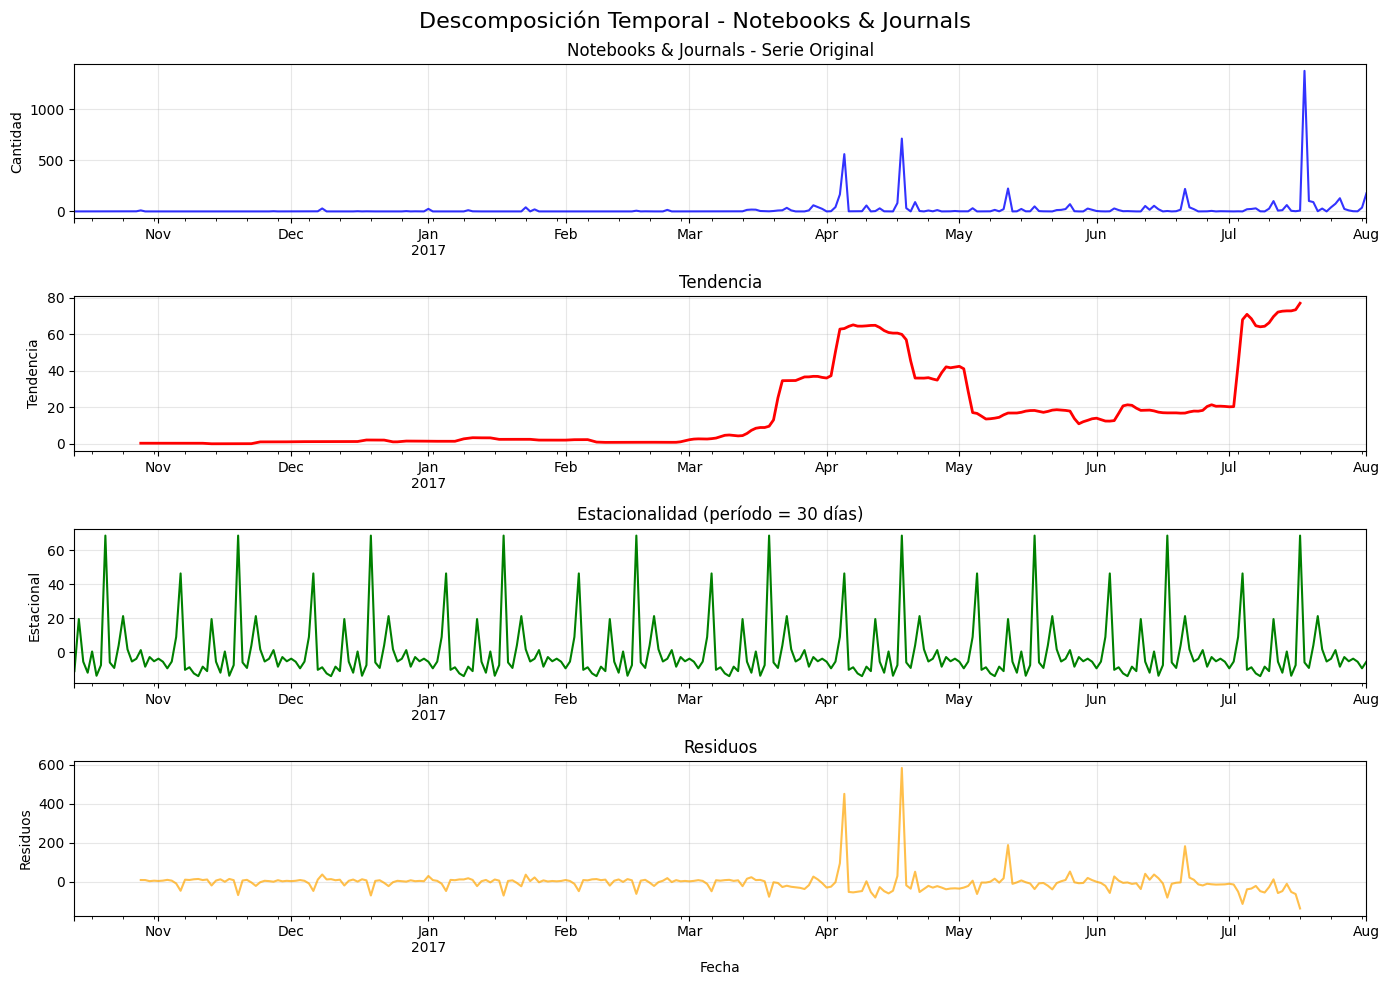

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 83.0 unidades

🔄 Procesando: Office
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 292 | Días sin ventas: 1


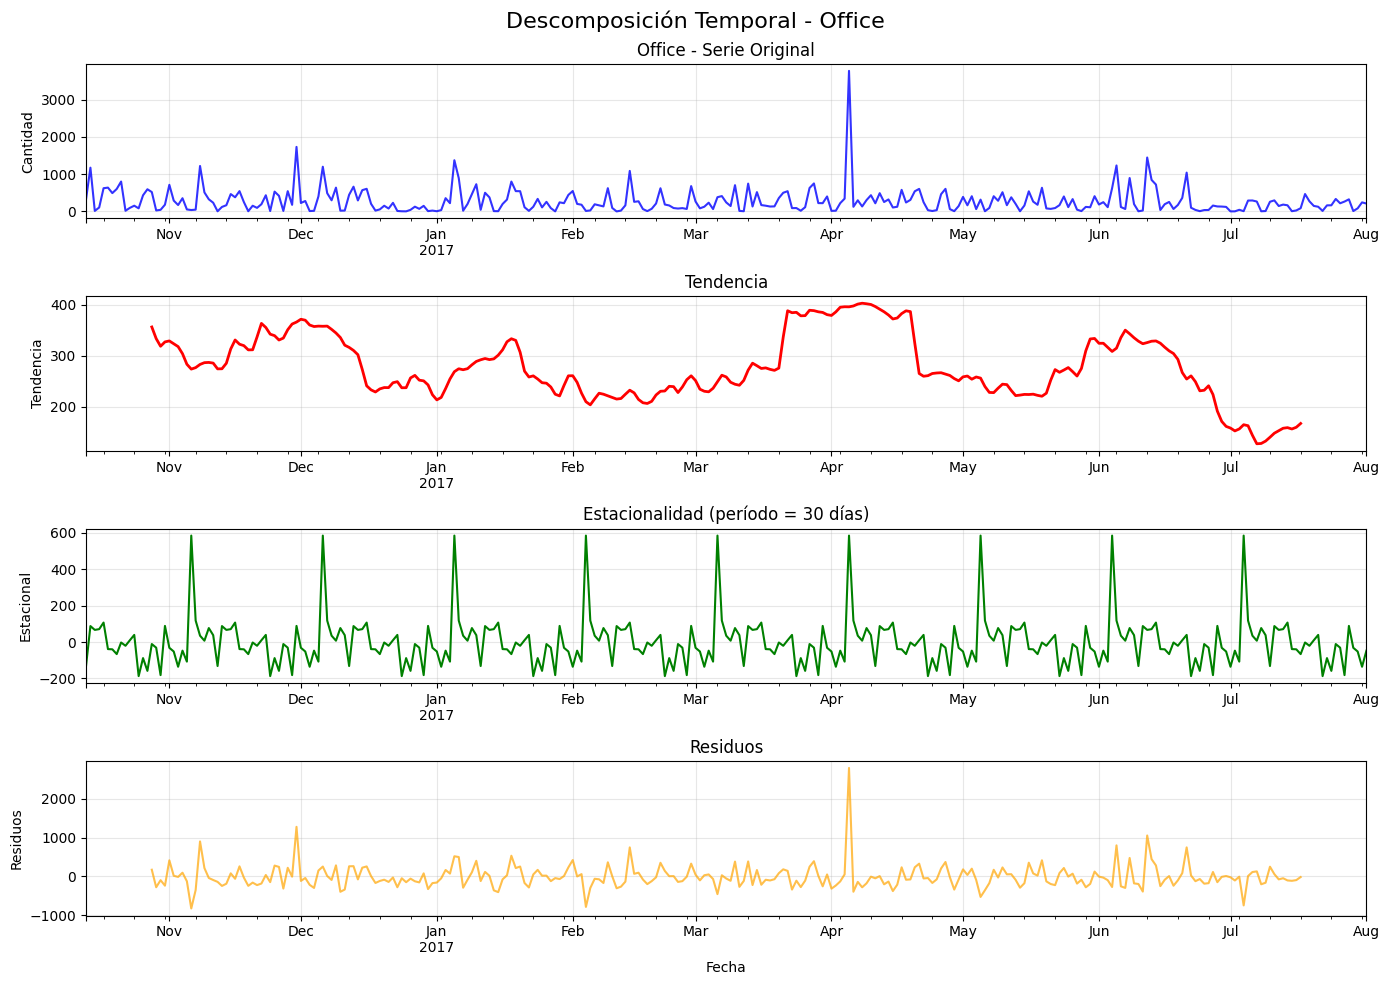

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 772.9 unidades

🔄 Procesando: Tumblers
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 5 | Días sin ventas: 288


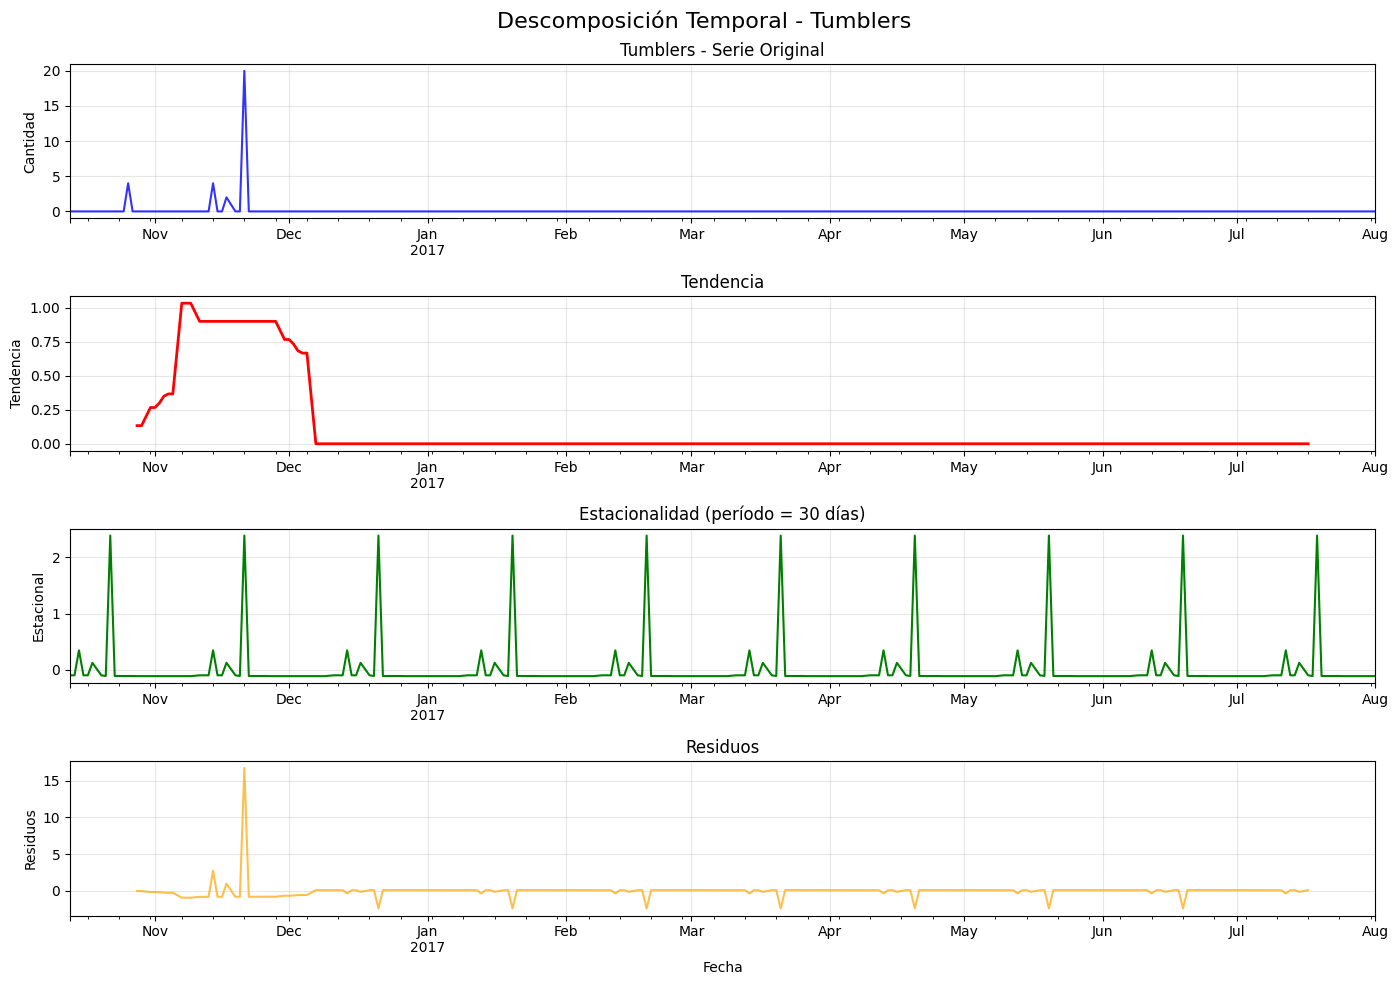

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 2.5 unidades

🔄 Procesando: Waze
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 117 | Días sin ventas: 176


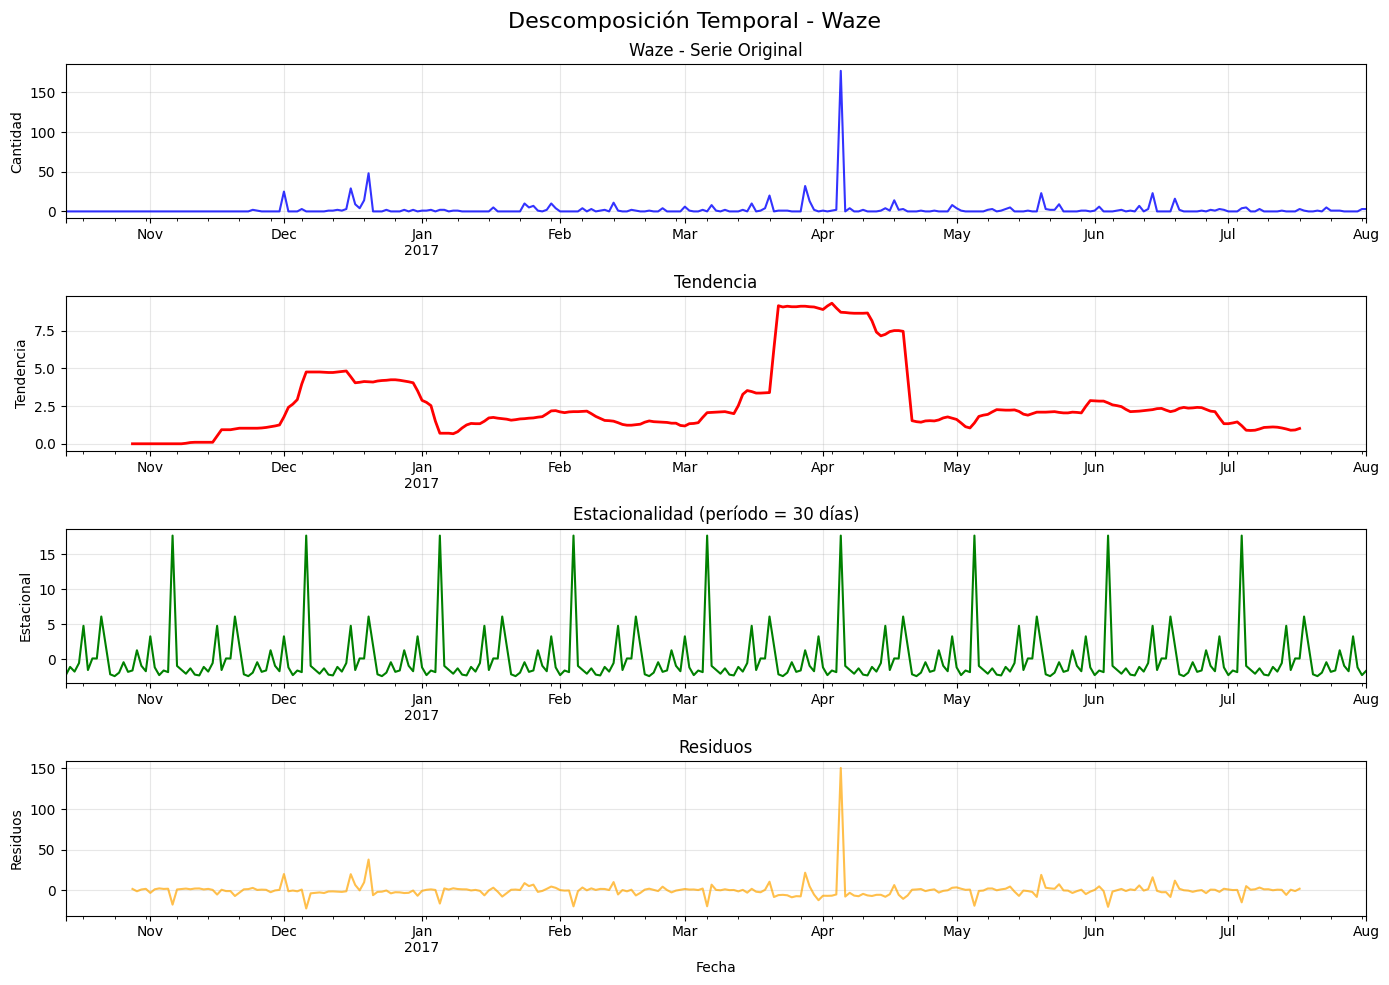

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 20.1 unidades

🎉 Análisis completado!

💡 CONFIGURACIÓN USADA:
   • Período estacional: 30 días (mensual)
   • Modelo: additive
   • Relleno: 0s en días sin ventas (solo rango activo por categoría)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as tsa_seasonal

# CONFIGURACIÓN ESTÁNDAR
PERIOD = 30  # Estacionalidad mensual para todas las categorías
MODEL = 'additive'  # Modelo consistente
MIN_ACTIVE_DAYS = 30  # Mínimo de días con ventas para procesar

print("📊 RESUMEN INICIAL:")
print(f"Rango de fechas: {df['transaction_date'].min()} a {df['transaction_date'].max()}")
print(f"Total de días únicos: {df['transaction_date'].nunique()}")
print(f"Total de transacciones: {len(df)}")

# PASO 1: Ver qué categorías tienes
print(f"\nCategorías disponibles:")
category_stats = df['product_category'].value_counts()
print(category_stats)

# PASO 2: Análisis de actividad por categoría
print(f"\n--- ANÁLISIS DE ACTIVIDAD ---")
categories = df['product_category'].unique()

for category in categories:
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Contar días únicos con ventas
    active_days = df_category['transaction_date'].nunique()
    total_transactions = len(df_category)
    
    # Rango de fechas de esta categoría
    start_date = df_category['transaction_date'].min()
    end_date = df_category['transaction_date'].max()
    potential_days = (end_date - start_date).days + 1
    activity_rate = (active_days / potential_days) * 100
    
    print(f"{category:20} | Días activos: {active_days:3d} | Rango: {potential_days:3d} días | Actividad: {activity_rate:5.1f}% | Transacciones: {total_transactions}")

# PASO 3: Descomposición con relleno inteligente
print(f"\n--- DESCOMPOSICIÓN (período={PERIOD} días) ---")

for category in categories:
    print(f"\n🔄 Procesando: {category}")
    
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar actividad mínima
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        print(f"   ❌ Insuficiente actividad ({active_days} días activos < {MIN_ACTIVE_DAYS}). Saltando...")
        continue
    
    # Agrupar por fecha (sumar cantidades del mismo día)
    ts_data = df_category.groupby('transaction_date')['product_quantity'].sum()
    
    # RELLENO INTELIGENTE: Solo en el rango activo de esta categoría
    start_date = ts_data.index.min()
    end_date = ts_data.index.max()
    full_date_range = pd.date_range(start_date, end_date, freq='D')
    
    # Crear serie temporal completa con 0s en días sin ventas
    ts = ts_data.reindex(full_date_range, fill_value=0)
    
    total_days = len(ts)
    zero_days = (ts == 0).sum()
    
    print(f"   📅 Rango: {start_date.date()} a {end_date.date()} ({total_days} días)")
    print(f"   📈 Días con ventas: {total_days - zero_days} | Días sin ventas: {zero_days}")
    
    # Verificar que hay suficientes datos para el período elegido
    if total_days < 2 * PERIOD:
        print(f"   ⚠️  Advertencia: Solo {total_days} días para período de {PERIOD}. Continuando...")
    
    # Descomponer
    try:
        decomposition = tsa_seasonal.seasonal_decompose(ts, period=PERIOD, model=MODEL)
        
        # Visualizar
        fig, axes = plt.subplots(4, 1, figsize=(14, 10))
        
        # Serie original
        ts.plot(ax=axes[0], title=f'{category} - Serie Original', color='blue', alpha=0.8)
        axes[0].set_ylabel('Cantidad')
        axes[0].grid(True, alpha=0.3)
        
        # Tendencia
        decomposition.trend.plot(ax=axes[1], title='Tendencia', color='red', linewidth=2)
        axes[1].set_ylabel('Tendencia')
        axes[1].grid(True, alpha=0.3)
        
        # Estacionalidad
        decomposition.seasonal.plot(ax=axes[2], title=f'Estacionalidad (período = {PERIOD} días)', color='green')
        axes[2].set_ylabel('Estacional')
        axes[2].grid(True, alpha=0.3)
        
        # Residuos
        decomposition.resid.plot(ax=axes[3], title='Residuos', color='orange', alpha=0.7)
        axes[3].set_ylabel('Residuos')
        axes[3].set_xlabel('Fecha')
        axes[3].grid(True, alpha=0.3)
        
        plt.suptitle(f'Descomposición Temporal - {category}', size=16, y=0.98)
        plt.tight_layout()
        plt.show()
        
        # Estadísticas adicionales
        trend_slope = decomposition.trend.dropna().iloc[-1] - decomposition.trend.dropna().iloc[0]
        seasonal_amplitude = decomposition.seasonal.max() - decomposition.seasonal.min()
        
        print(f"   ✅ Procesado correctamente")
        print(f"   📊 Tendencia general: {'📈 Creciente' if trend_slope > 0 else '📉 Decreciente' if trend_slope < 0 else '➡️  Estable'}")
        print(f"   🔄 Amplitud estacional: {seasonal_amplitude:.1f} unidades")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

print("\n🎉 Análisis completado!")
print(f"\n💡 CONFIGURACIÓN USADA:")
print(f"   • Período estacional: {PERIOD} días ({'mensual' if PERIOD == 30 else 'semanal' if PERIOD == 7 else 'personalizado'})")
print(f"   • Modelo: {MODEL}")
print(f"   • Relleno: 0s en días sin ventas (solo rango activo por categoría)")

📊 RESUMEN INICIAL:
Rango de fechas: 2016-10-13 00:00:00 a 2017-08-01 00:00:00
Total de días únicos: 293
Total de transacciones: 5567

Categorías disponibles:
product_category
Accessories             293
Android                 293
Apparel                 293
Backpacks               293
Bags                    293
Bottles                 293
Drinkware               293
Electronics             293
Fun                     293
Gift Cards              293
Google                  293
Headgear                293
Housewares              293
Lifestyle               293
More Bags               293
Notebooks & Journals    293
Office                  293
Tumblers                293
Waze                    293
Name: count, dtype: int64

--- ANÁLISIS DE ACTIVIDAD ---
Accessories          | Días activos: 293 | Rango: 293 días | Actividad: 100.0% | Transacciones: 293
Android              | Días activos: 293 | Rango: 293 días | Actividad: 100.0% | Transacciones: 293
Apparel              | Días activos:

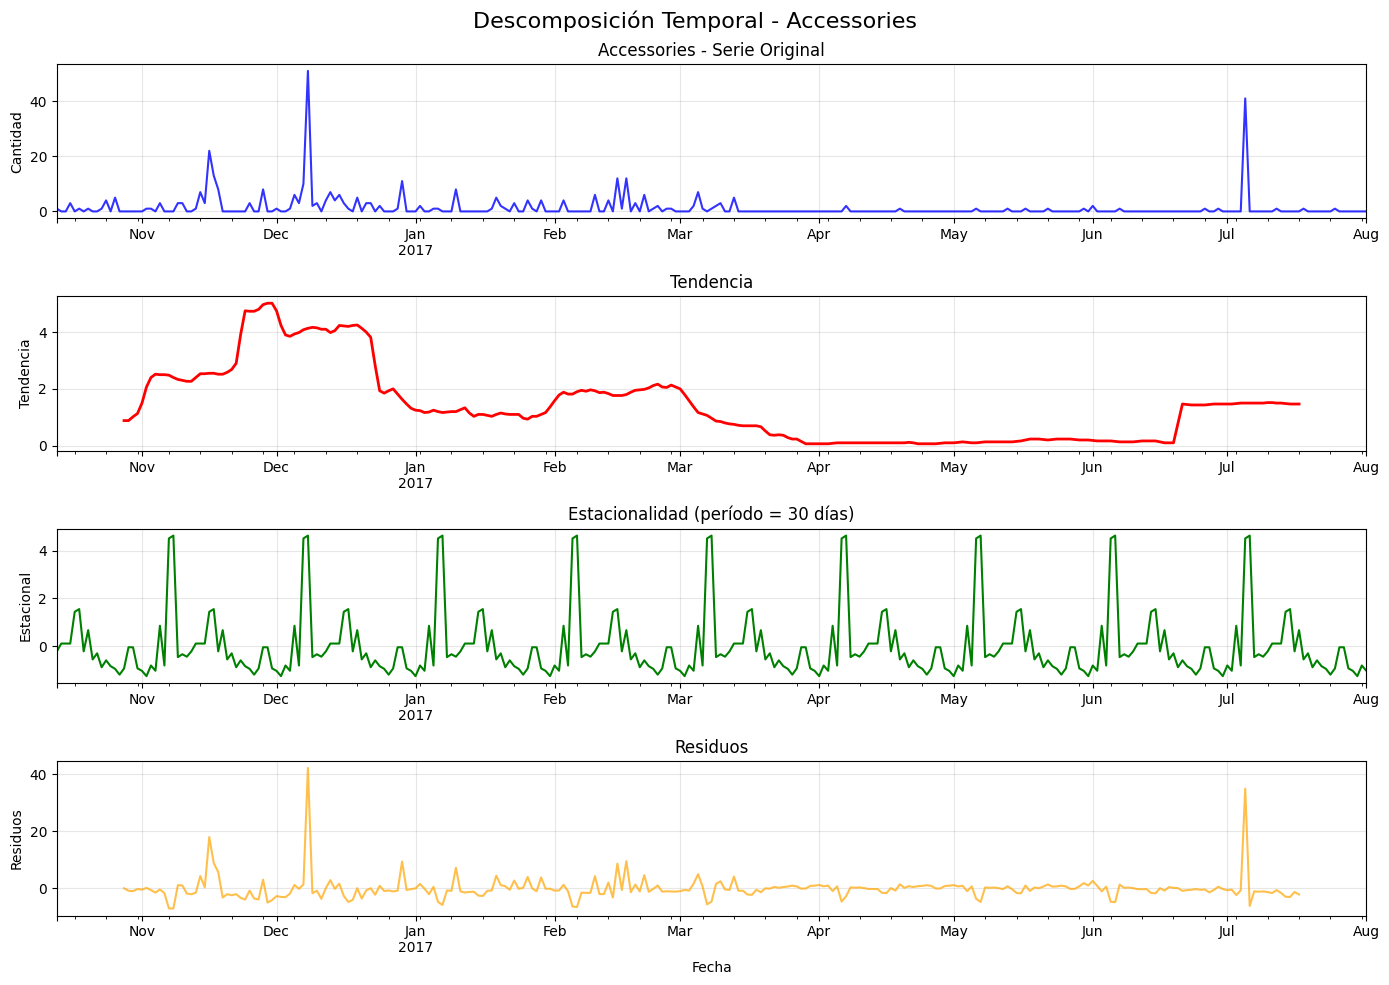

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 5.9 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Android
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 24 | Días sin ventas: 269
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.617 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -1.355 | Critical 5%: -2.873 | p-value (0.6034) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -6.796 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -7.233 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


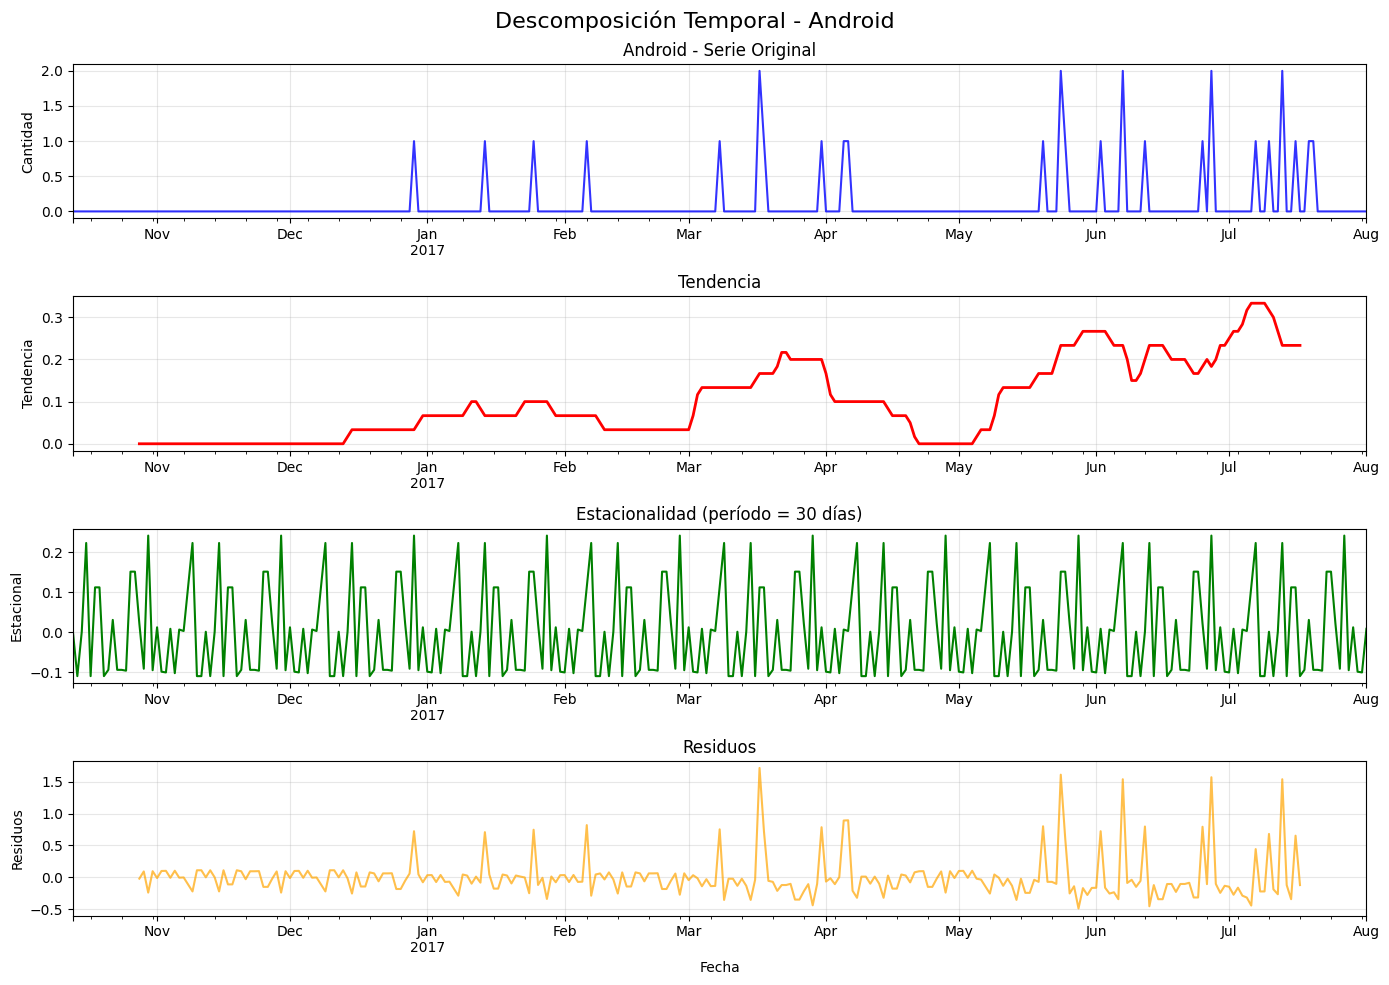

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 0.4 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Apparel
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 293 | Días sin ventas: 0
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -14.416 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.078 | Critical 5%: -2.873 | p-value (0.2536) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -7.641 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.833 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


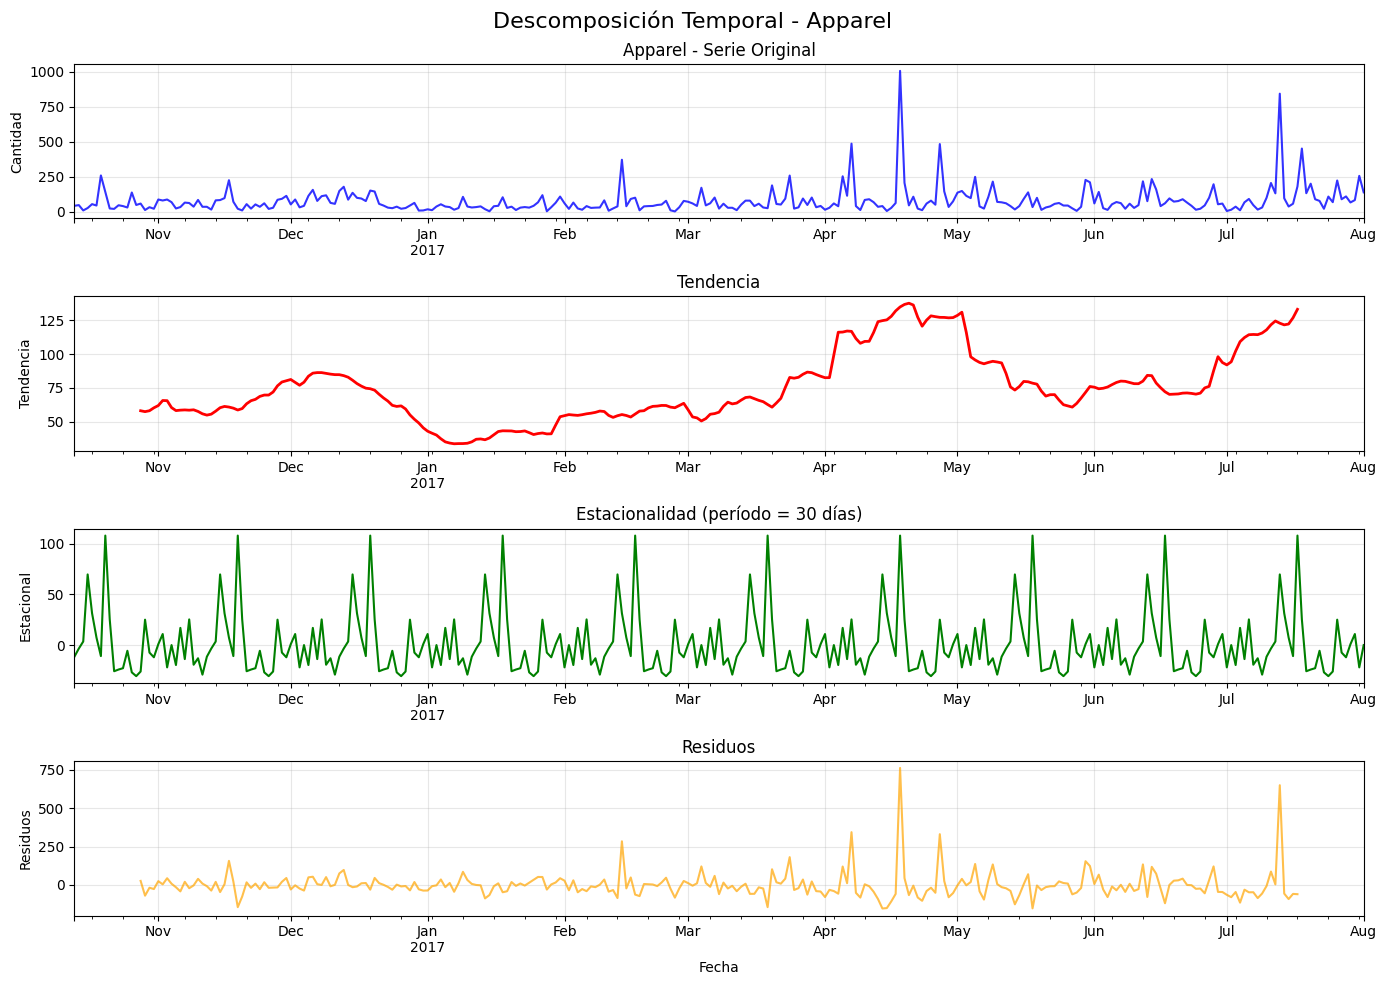

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 138.4 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Backpacks
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 75 | Días sin ventas: 218
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.355 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -2.959 | Critical 5%: -2.873 | p-value (0.0389) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -7.131 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.417 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


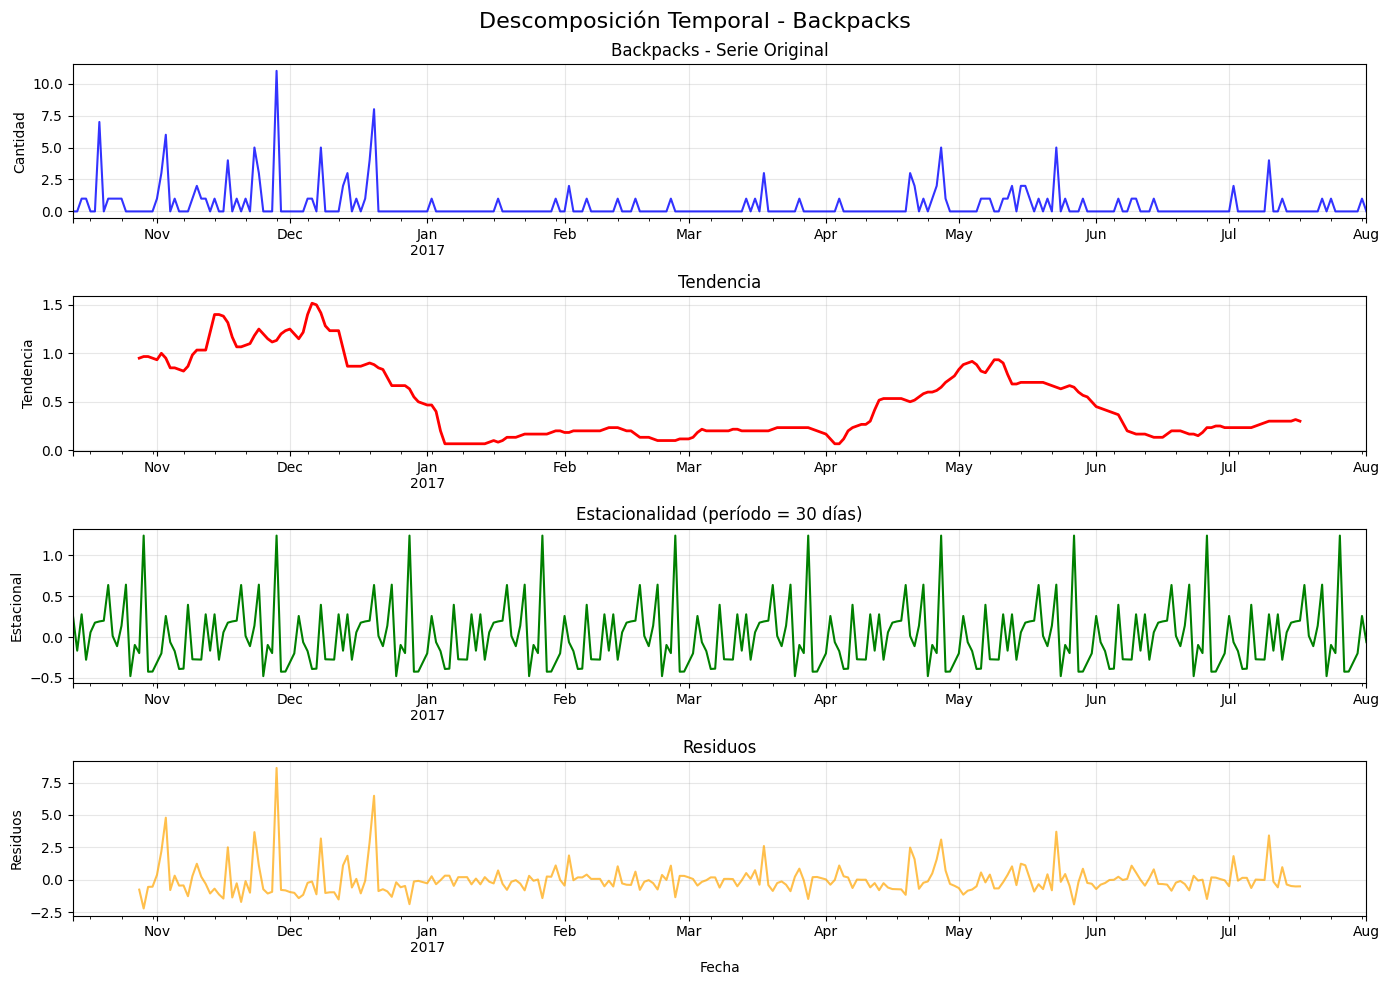

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 1.7 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Bags
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 275 | Días sin ventas: 18
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.872 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -3.736 | Critical 5%: -2.873 | p-value (0.0036) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -6.702 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -7.735 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


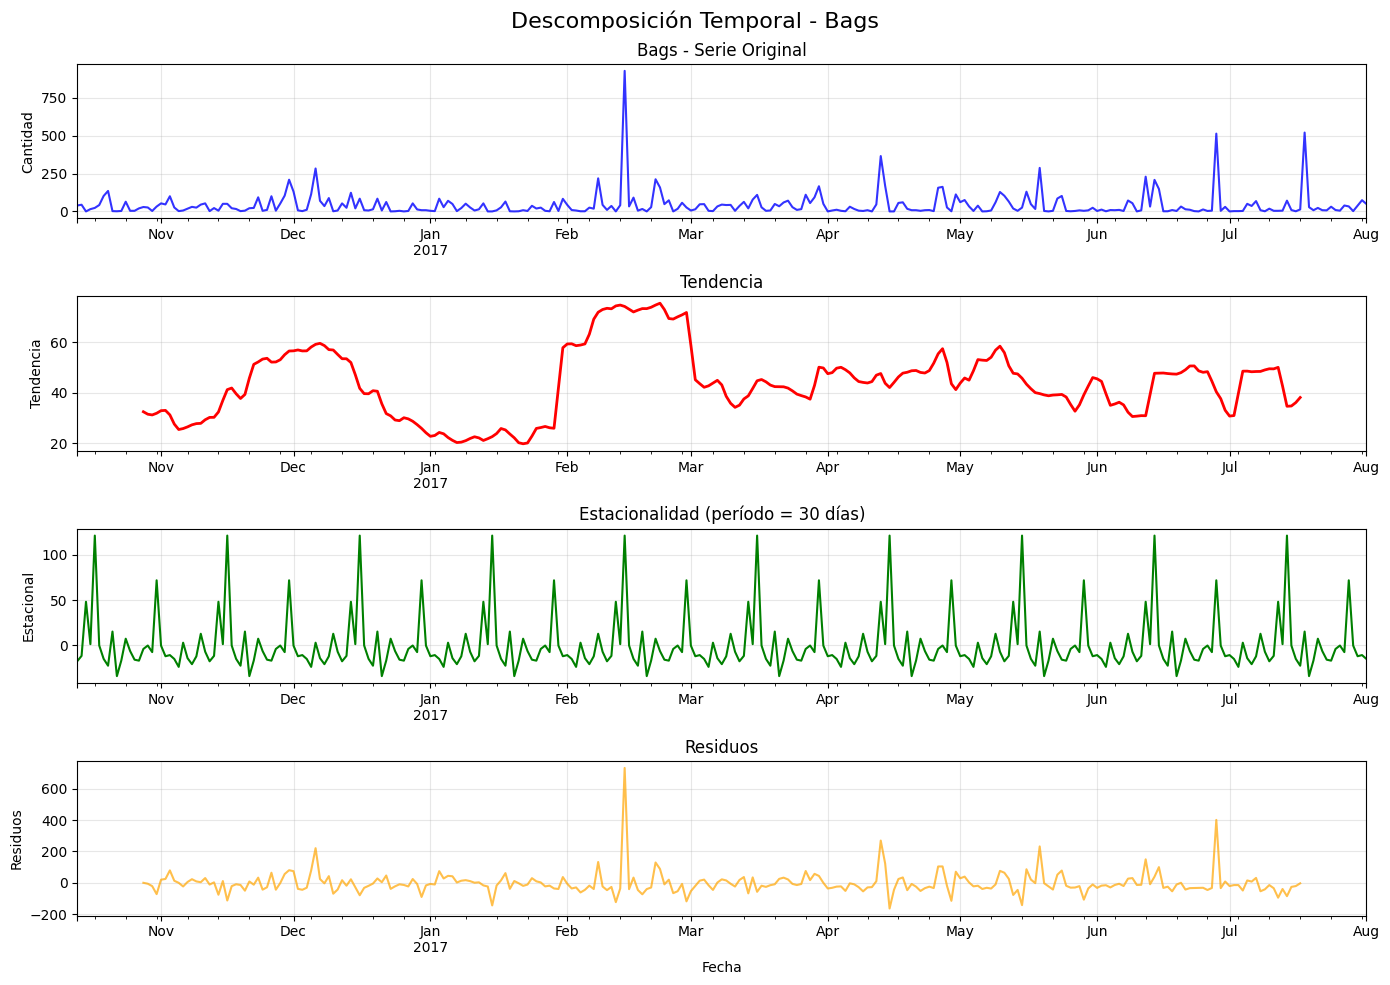

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 154.9 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Bottles
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 135 | Días sin ventas: 158
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -16.551 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.456 | Critical 5%: -2.873 | p-value (0.1264) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -6.661 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -9.593 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


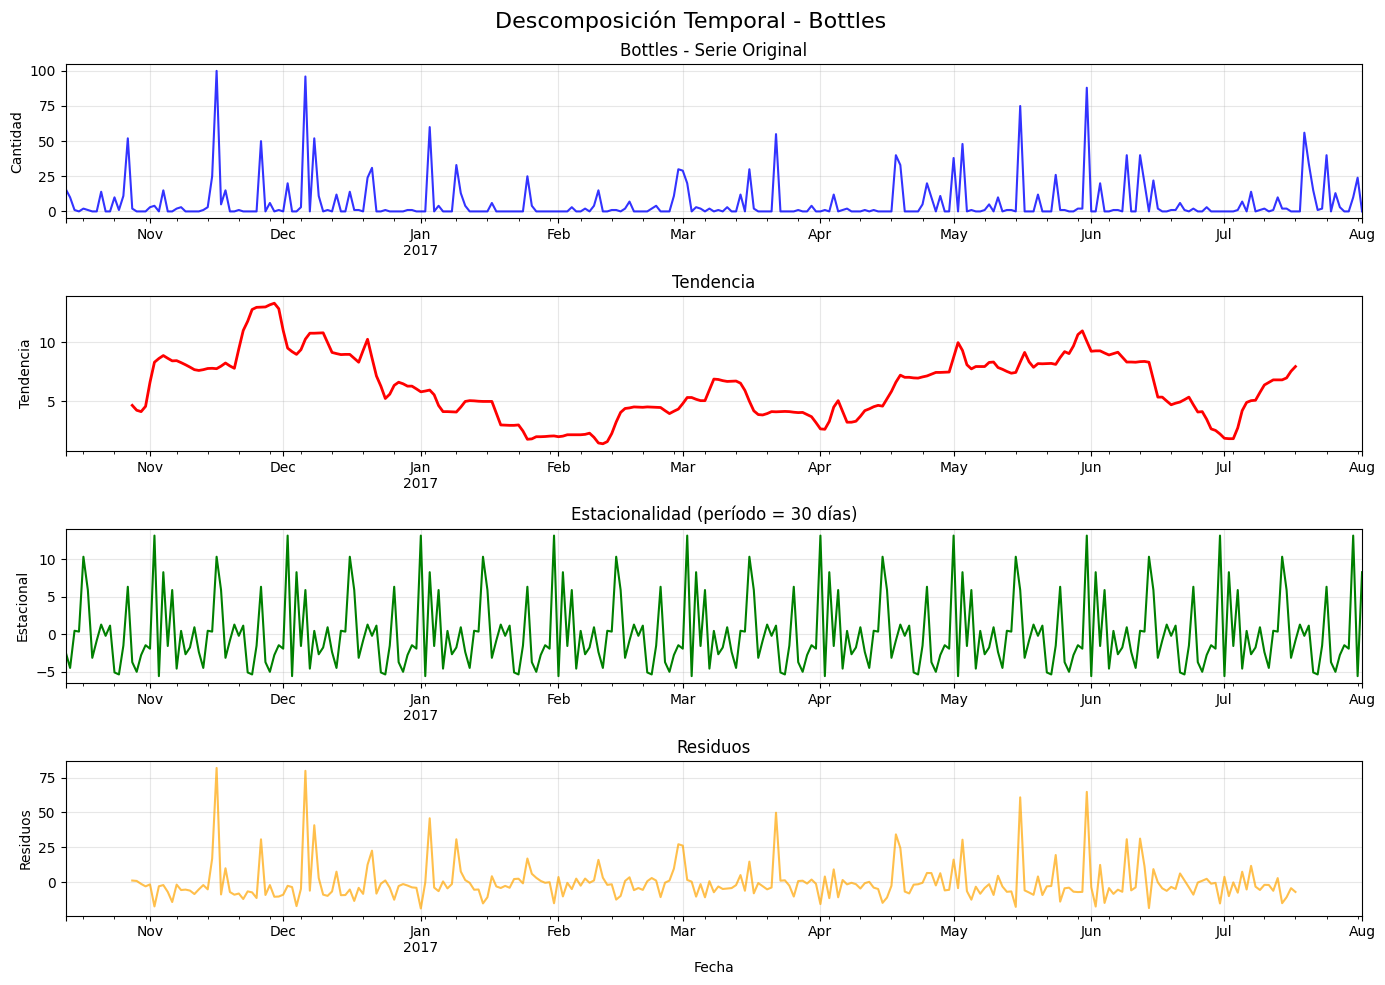

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 18.8 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Drinkware
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 288 | Días sin ventas: 5
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -3.719 | Critical 5%: -2.872 | p-value (0.0039) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -3.047 | Critical 5%: -2.873 | p-value (0.0307) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -7.466 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.716 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


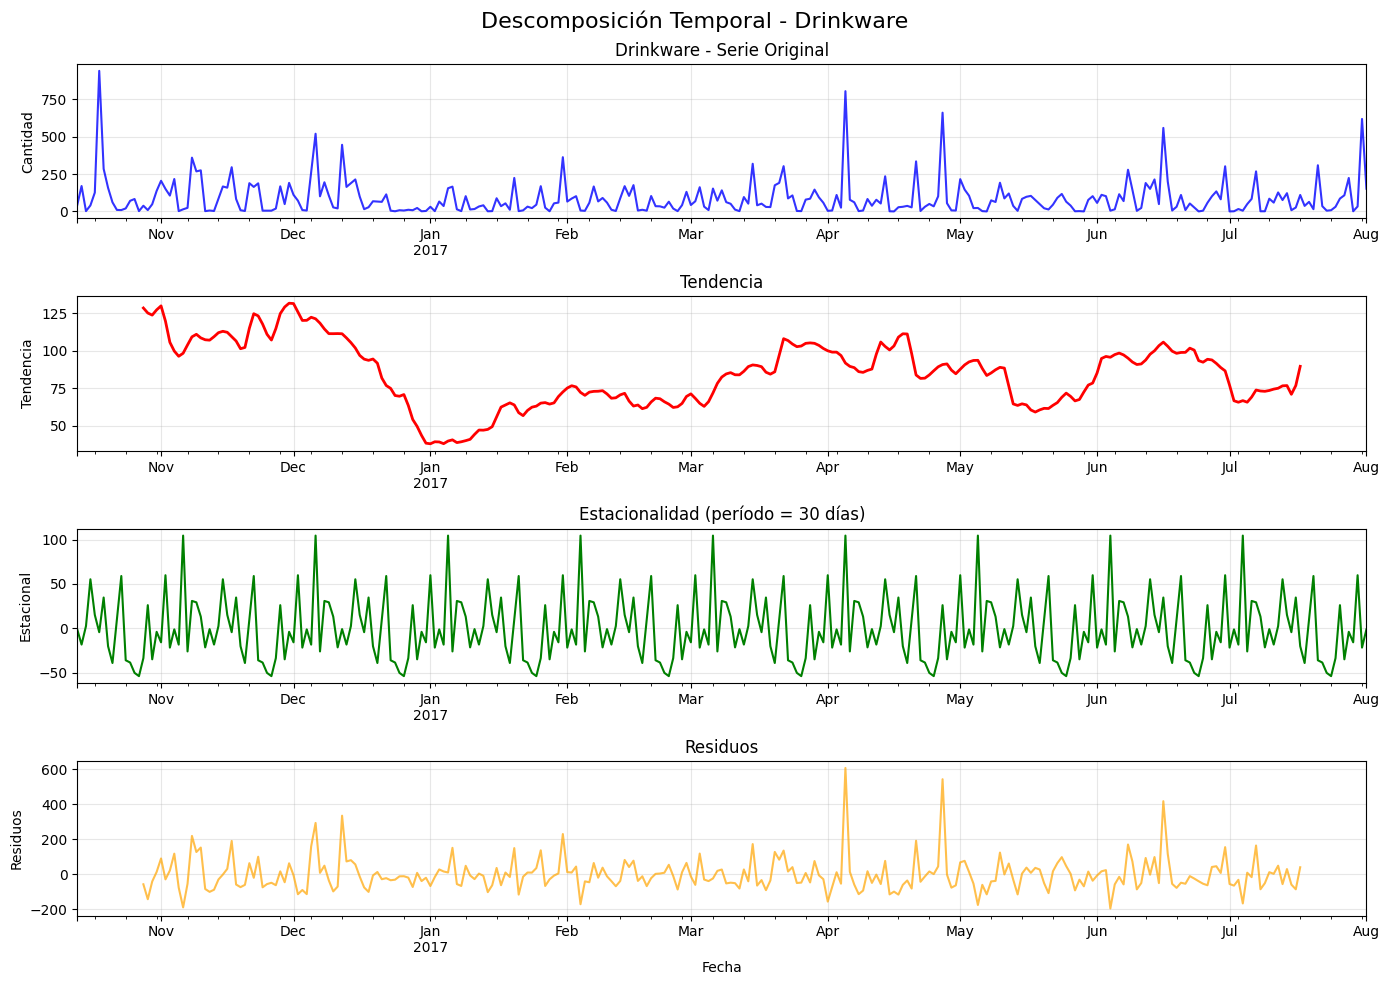

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 158.7 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Electronics
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 262 | Días sin ventas: 31
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.523 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.213 | Critical 5%: -2.873 | p-value (0.2017) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -12.590 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -9.548 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


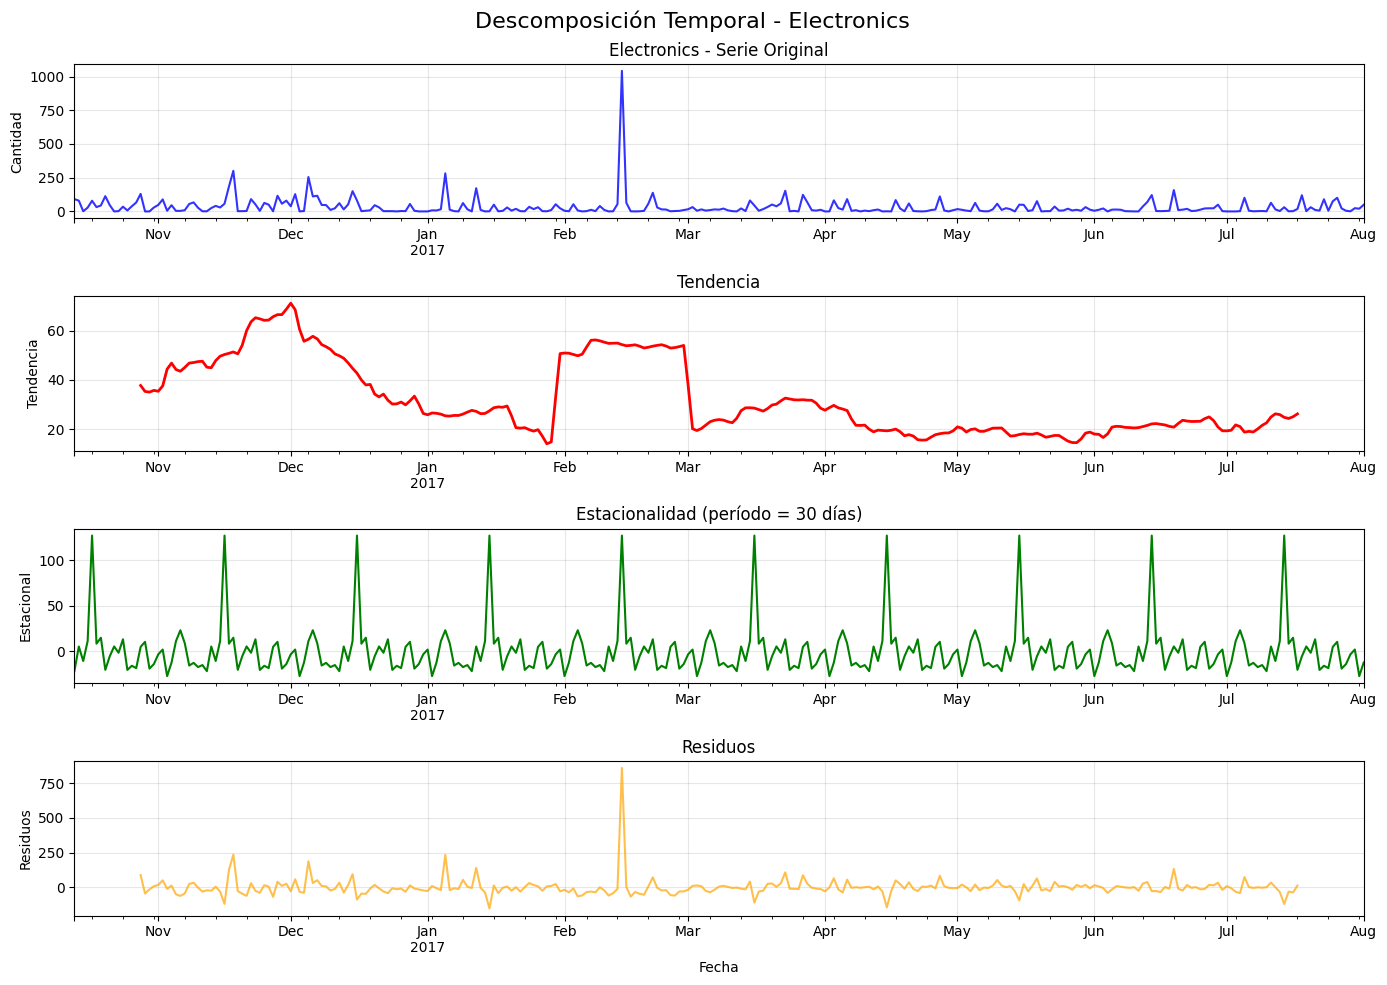

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 154.3 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Fun
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 55 | Días sin ventas: 238
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -16.990 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.166 | Critical 5%: -2.873 | p-value (0.2188) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.741 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.518 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


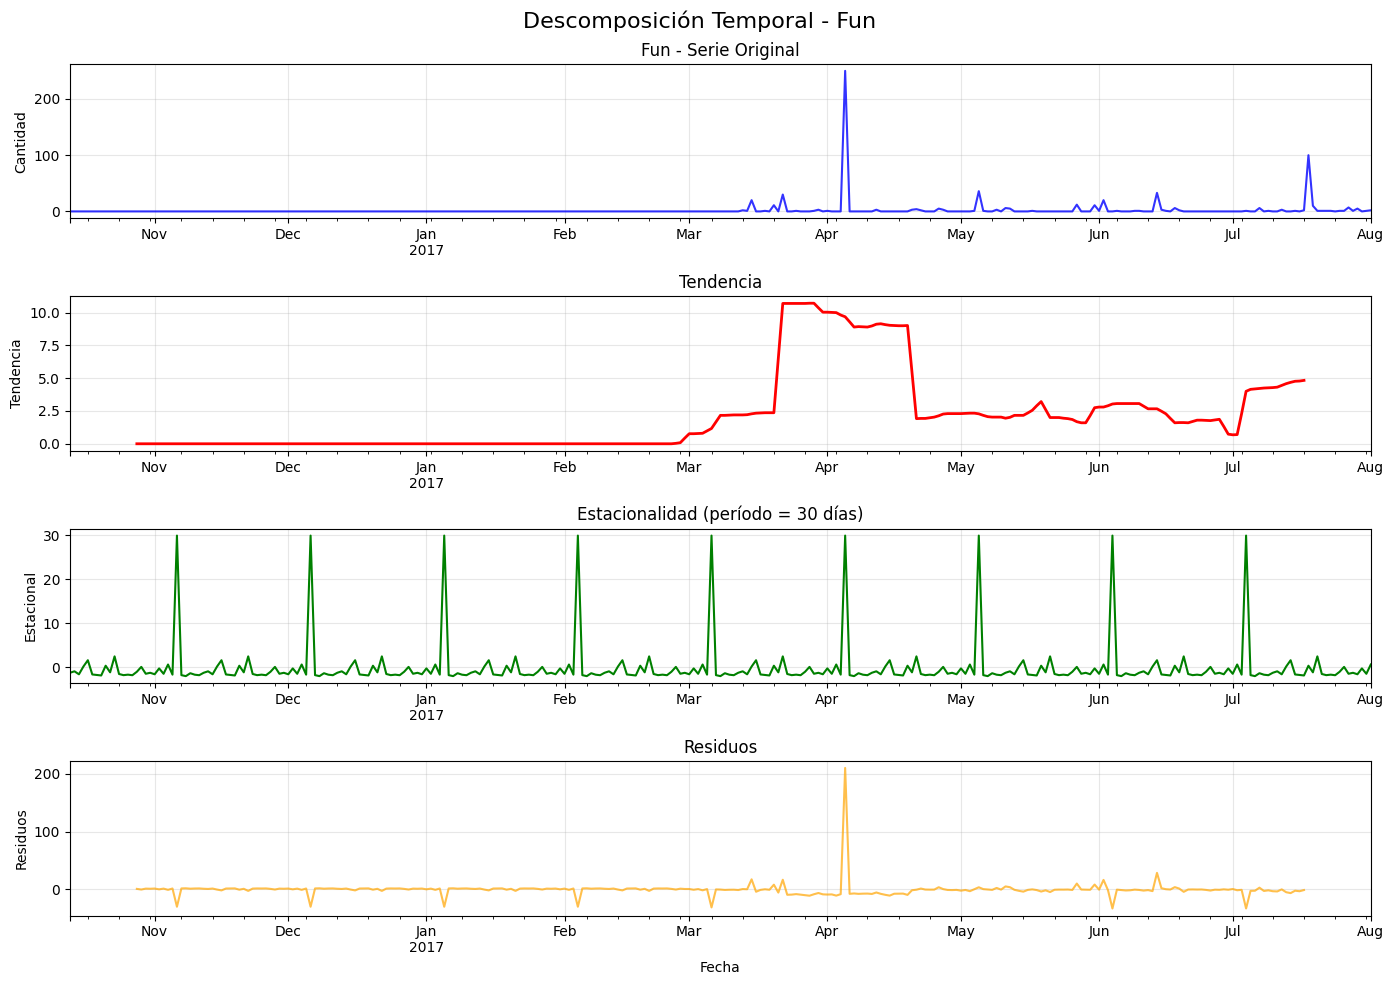

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 31.9 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Gift Cards
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 52 | Días sin ventas: 241
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -17.075 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -1.692 | Critical 5%: -2.873 | p-value (0.4353) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.427 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.299 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


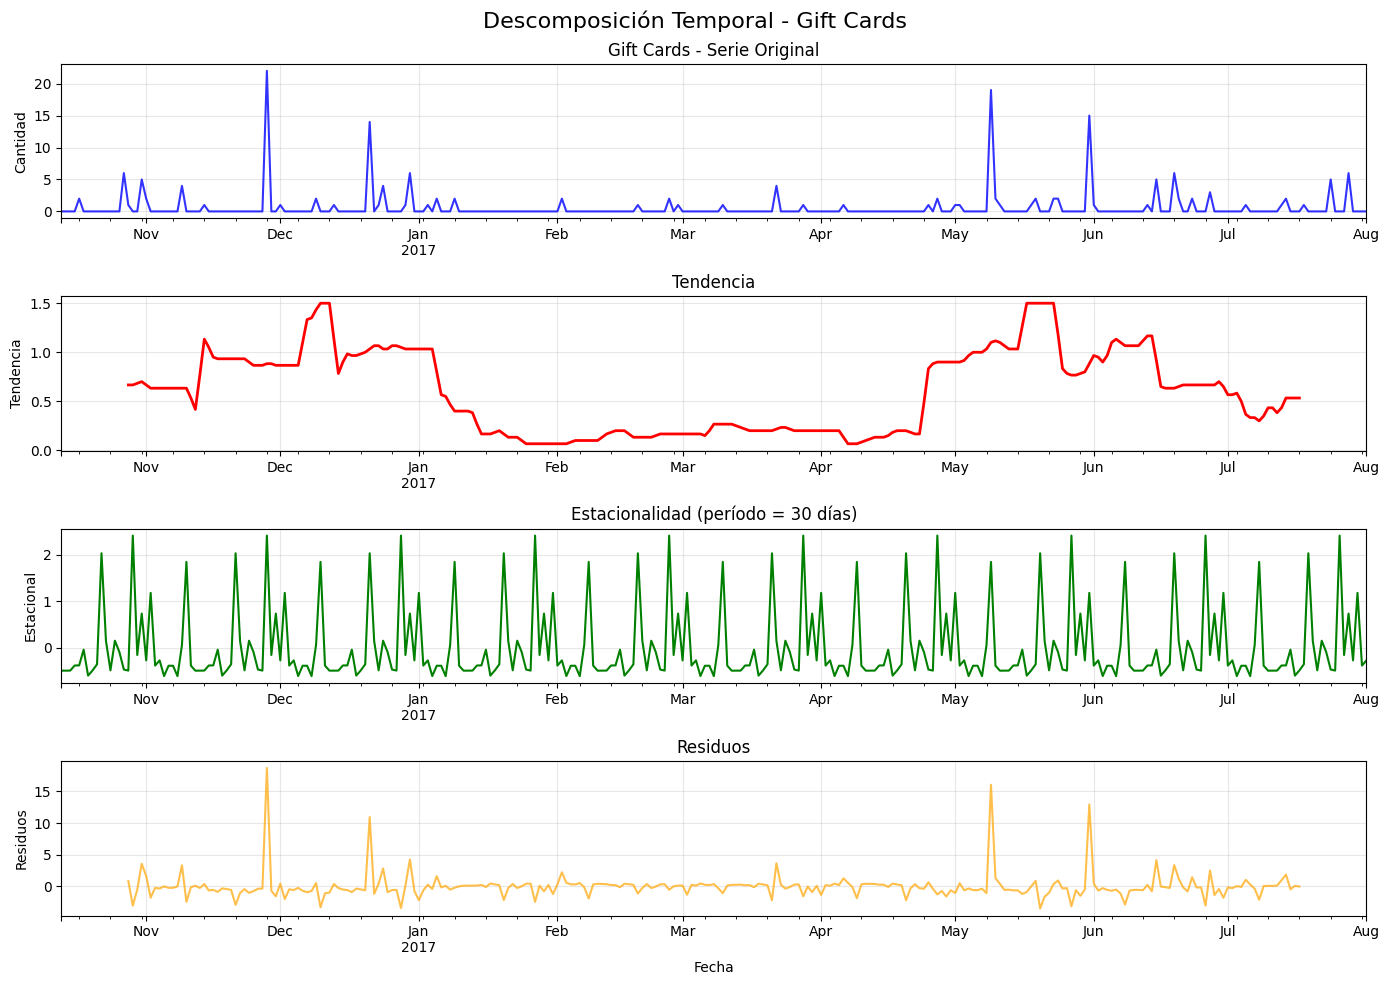

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 3.0 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Google
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 76 | Días sin ventas: 217
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.877 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -1.995 | Critical 5%: -2.873 | p-value (0.2886) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -5.745 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.681 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


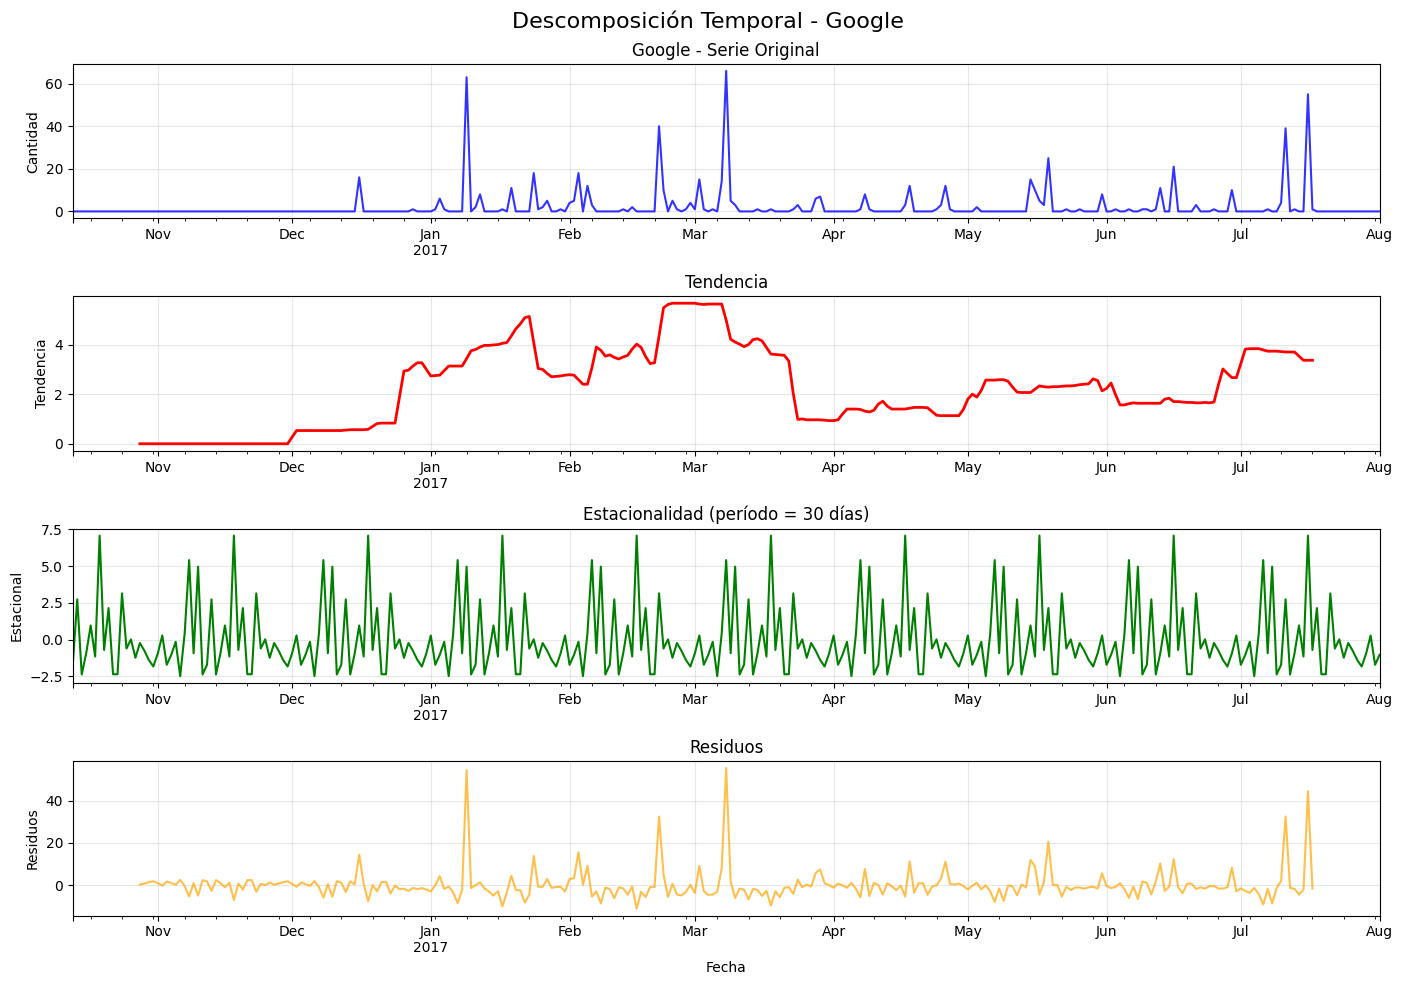

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 9.6 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Headgear
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 223 | Días sin ventas: 70
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -16.368 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.690 | Critical 5%: -2.873 | p-value (0.0757) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.090 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.391 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


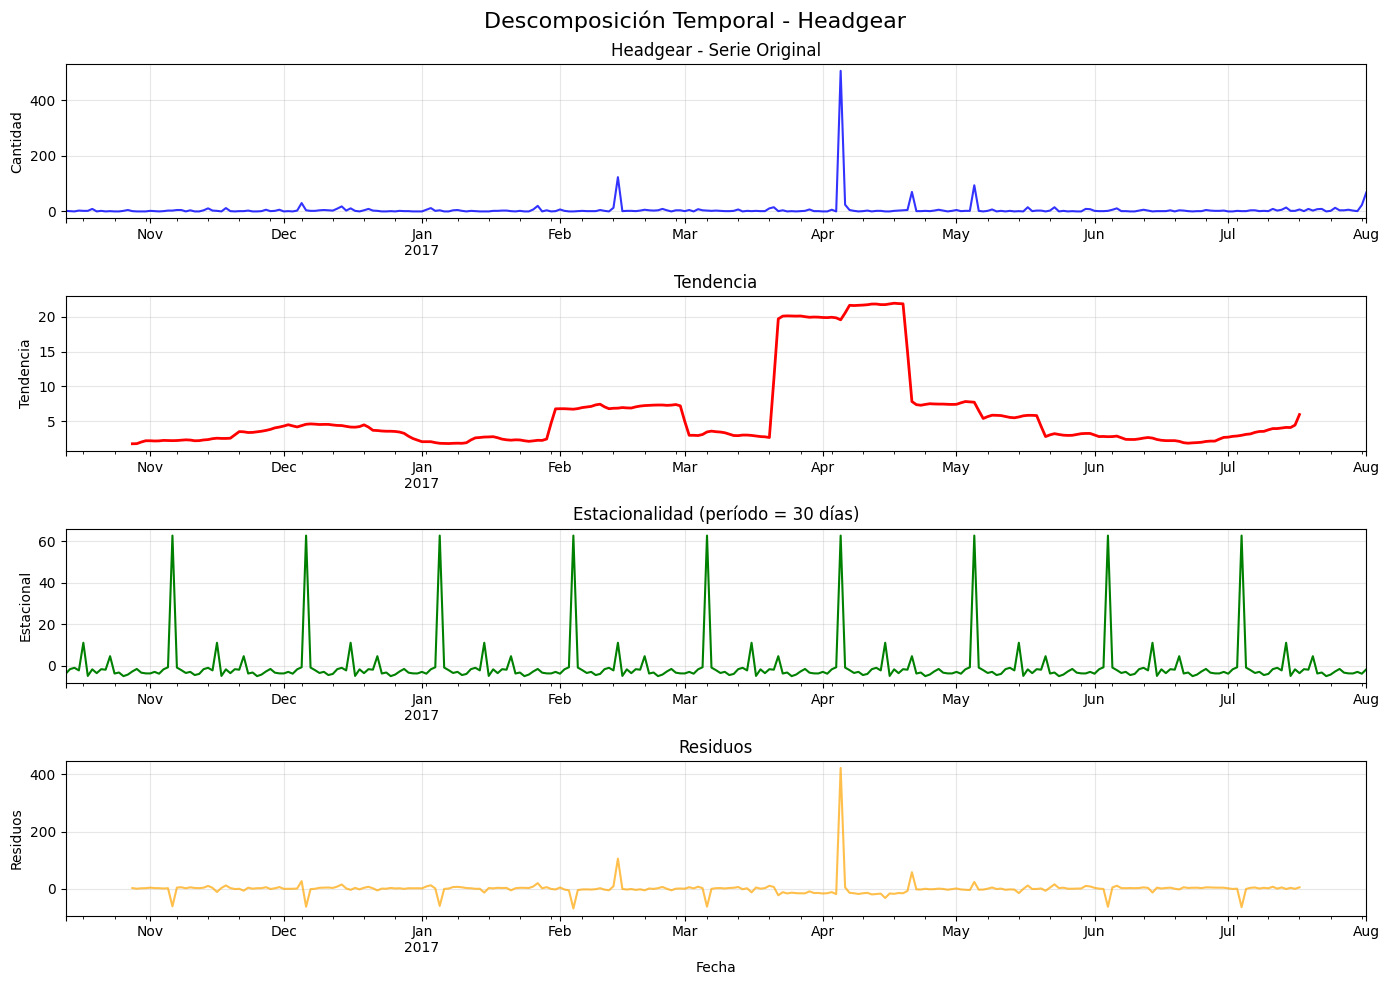

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 67.8 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Housewares
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 79 | Días sin ventas: 214
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -17.477 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.097 | Critical 5%: -2.873 | p-value (0.2457) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.642 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.278 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


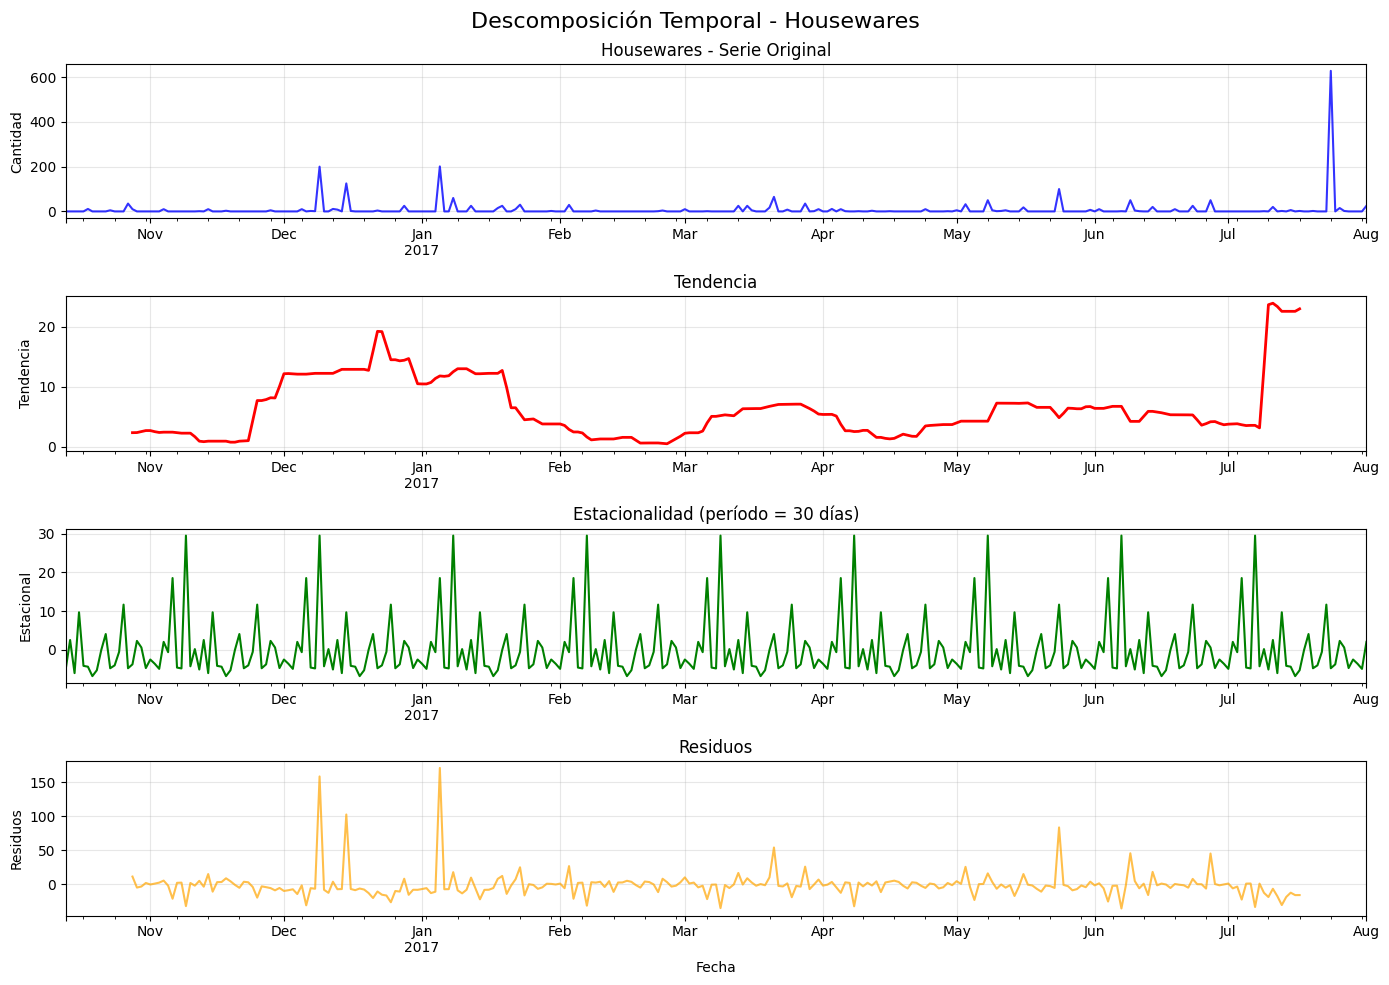

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 36.4 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Lifestyle
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 273 | Días sin ventas: 20
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -16.769 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -2.192 | Critical 5%: -2.873 | p-value (0.2090) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -6.666 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -11.843 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


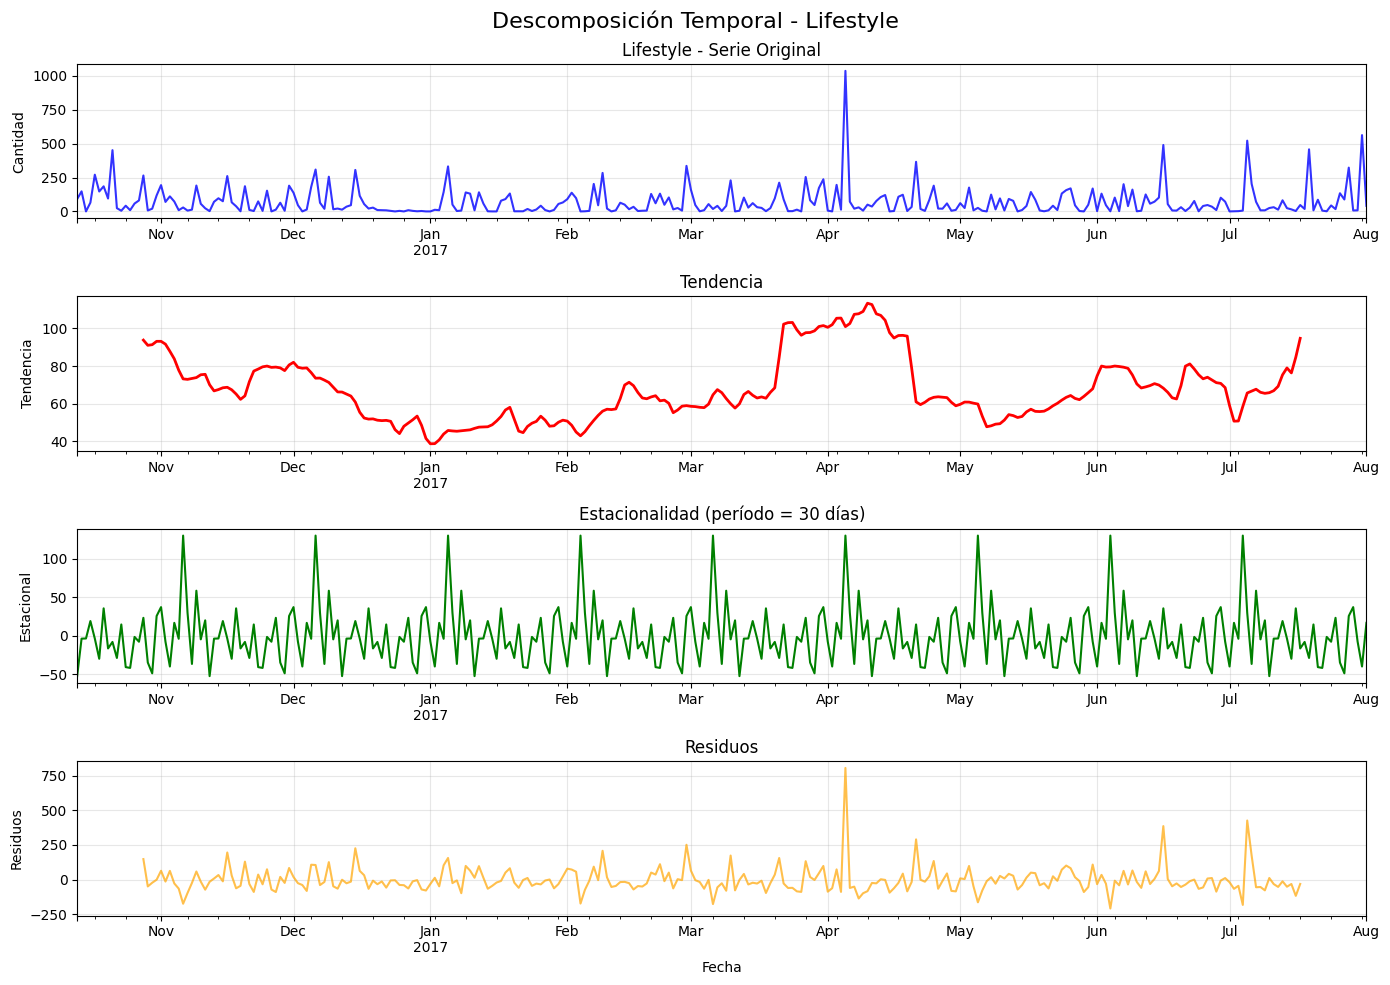

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 182.4 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: More Bags
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 52 | Días sin ventas: 241
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -17.169 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -1.767 | Critical 5%: -2.873 | p-value (0.3969) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.502 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.552 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


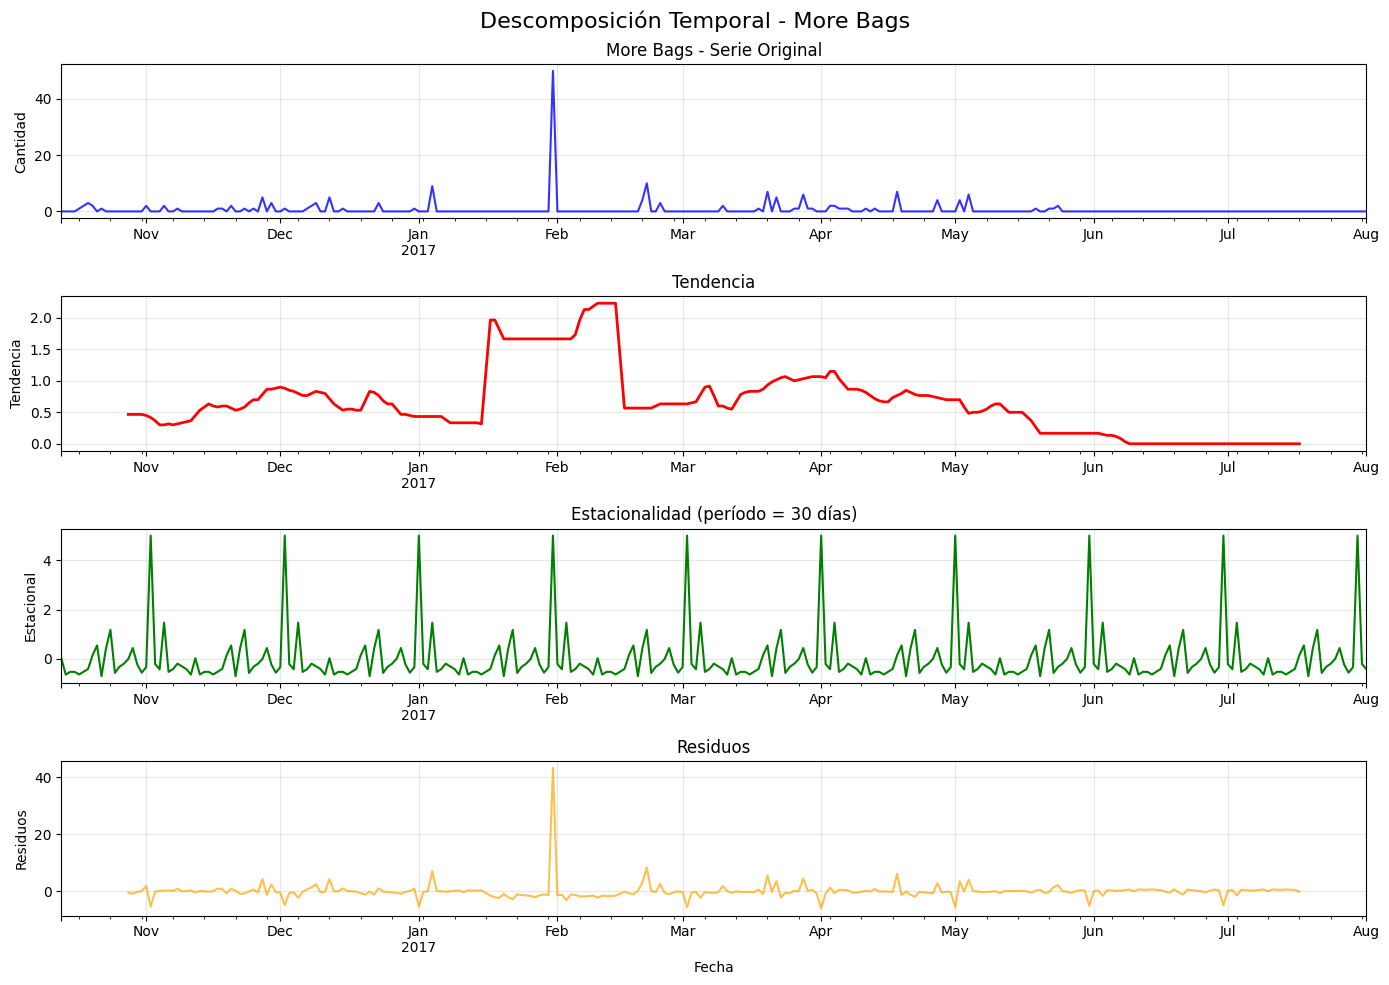

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 5.7 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Notebooks & Journals
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 136 | Días sin ventas: 157
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -15.287 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ❌ NO ESTACIONARIA | ADF: -1.357 | Critical 5%: -2.873 | p-value (0.6027) > 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -3.521 | Critical 5%: -2.873 | p-value (0.0075) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -8.927 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


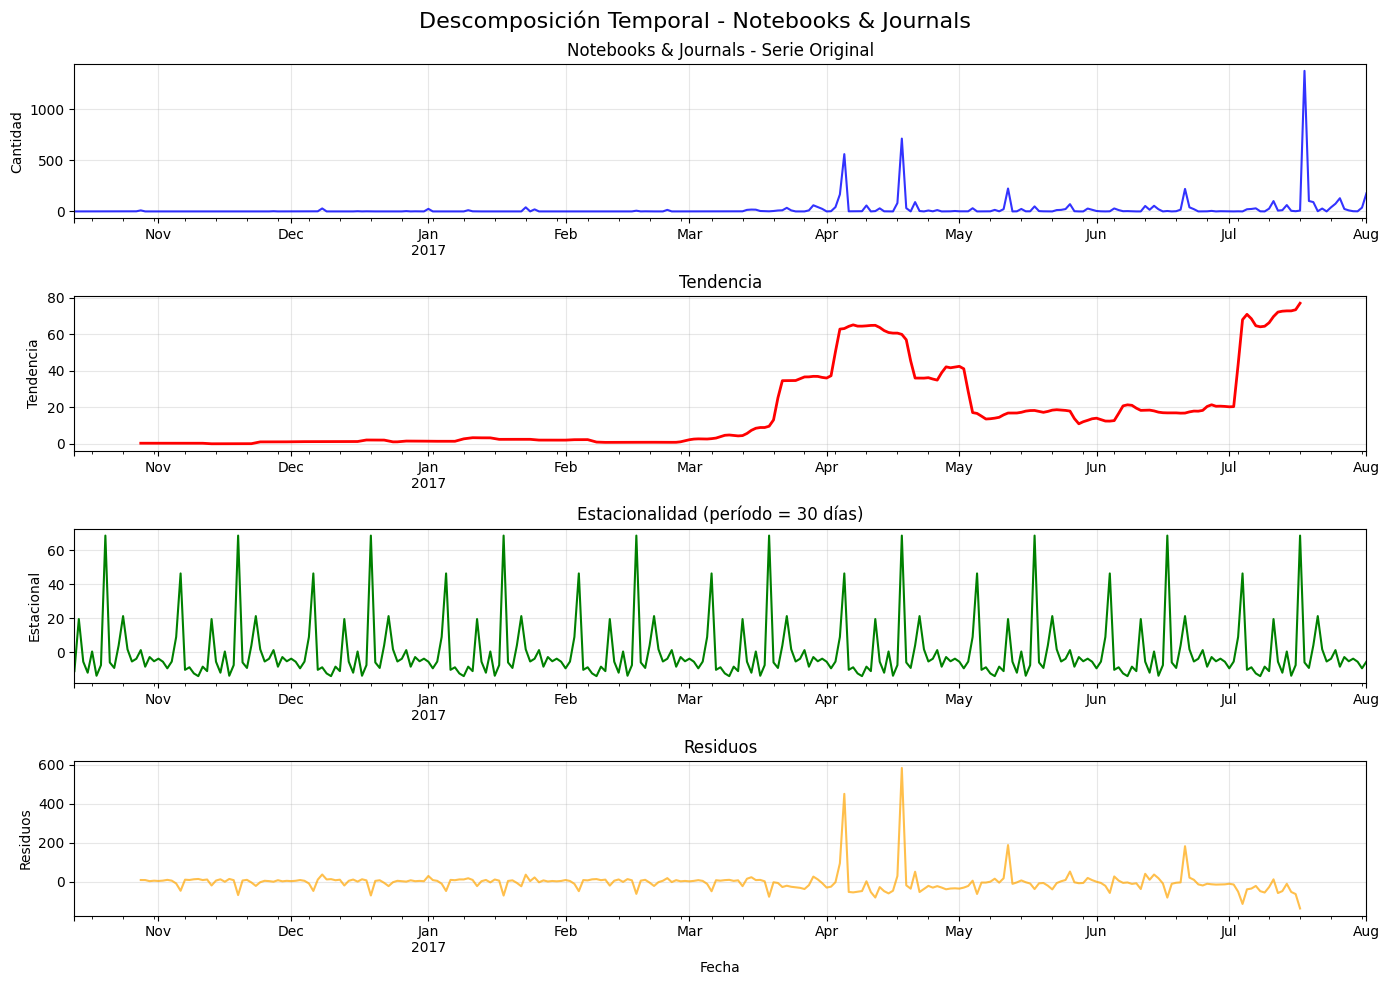

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 83.0 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Office
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 292 | Días sin ventas: 1
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -4.706 | Critical 5%: -2.872 | p-value (0.0001) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -3.297 | Critical 5%: -2.873 | p-value (0.0150) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -6.340 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -11.973 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


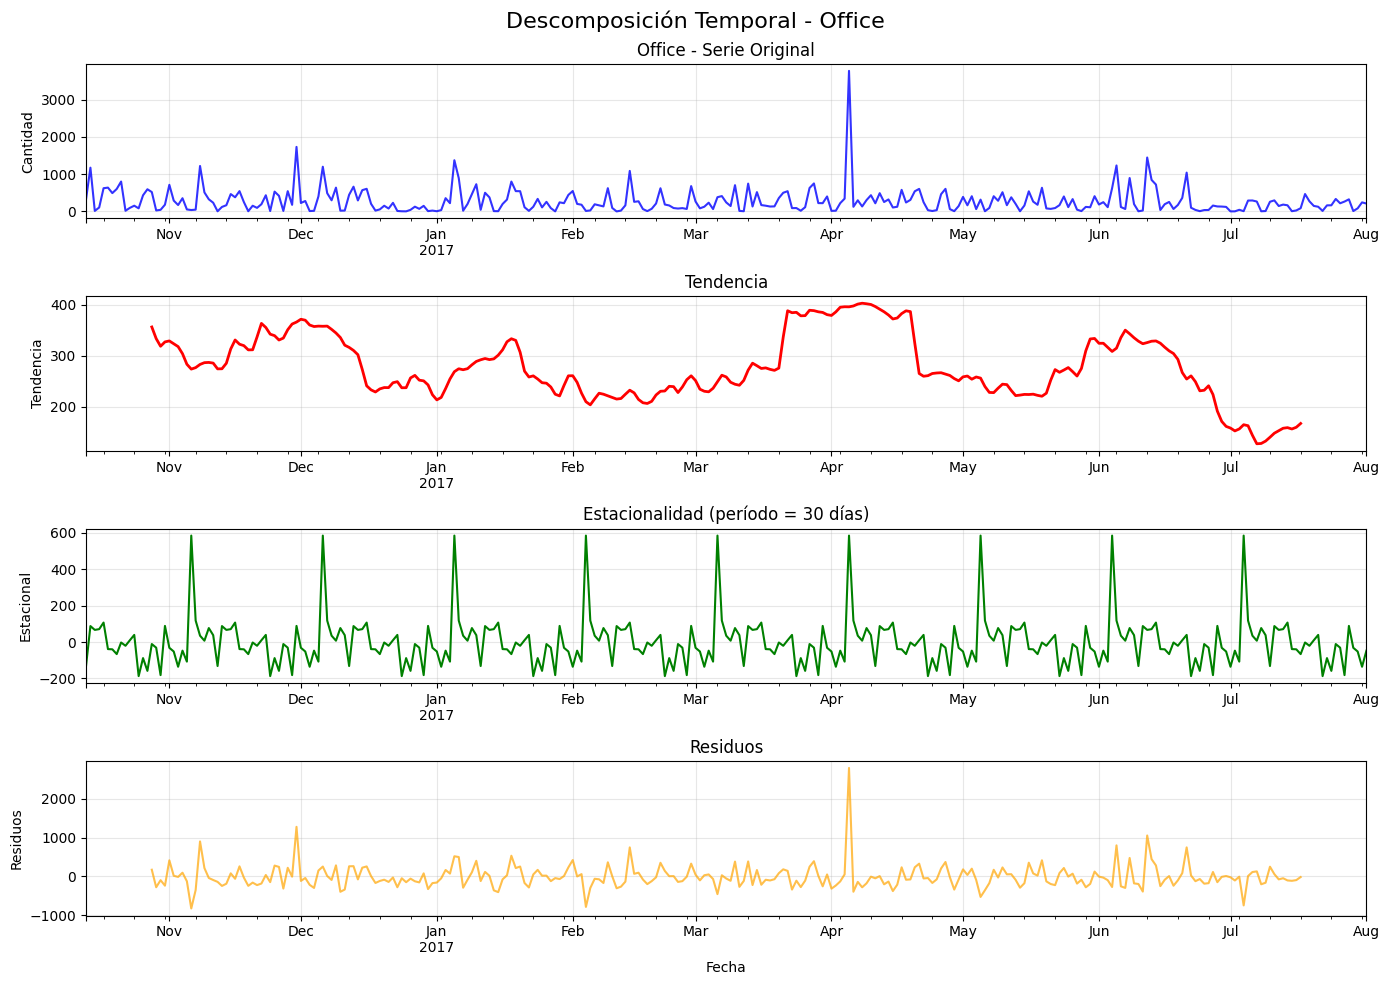

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 772.9 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Tumblers
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 5 | Días sin ventas: 288
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -17.080 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -4.072 | Critical 5%: -2.873 | p-value (0.0011) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -17.110 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -13.170 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


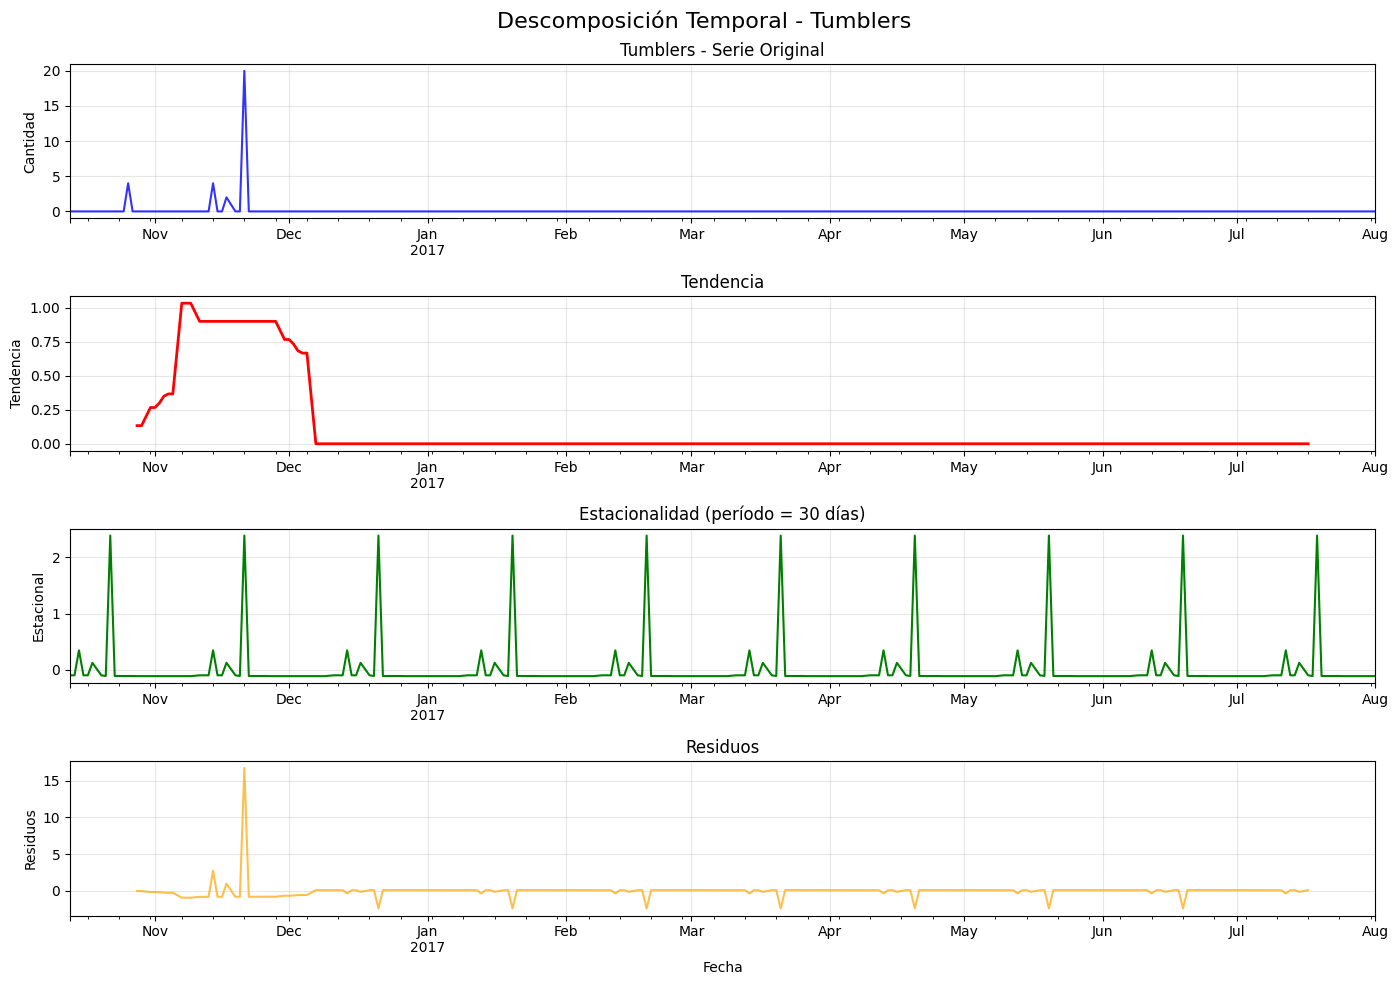

   ✅ Procesado correctamente
   📊 Tendencia general: 📉 Decreciente
   🔄 Amplitud estacional: 2.5 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🔄 Procesando: Waze
   📅 Rango: 2016-10-13 a 2017-08-01 (293 días)
   📈 Días con ventas: 117 | Días sin ventas: 176
   🔬 TESTS DE ESTACIONARIEDAD:
   📊 Test ADF para Serie Original:
      ✅ ESTACIONARIA | ADF: -16.689 | Critical 5%: -2.871 | p-value (0.0000) <= 0.05
   📊 Test ADF para Tendencia:
      ✅ ESTACIONARIA | ADF: -2.988 | Critical 5%: -2.873 | p-value (0.0360) <= 0.05
   📊 Test ADF para Residuos:
      ✅ ESTACIONARIA | ADF: -16.589 | Critical 5%: -2.873 | p-value (0.0000) <= 0.05
   📊 Test ADF para Diferenciada 1ra:
      ✅ ESTACIONARIA | ADF: -12.425 | Critical 5%: -2.872 | p-value (0.0000) <= 0.05


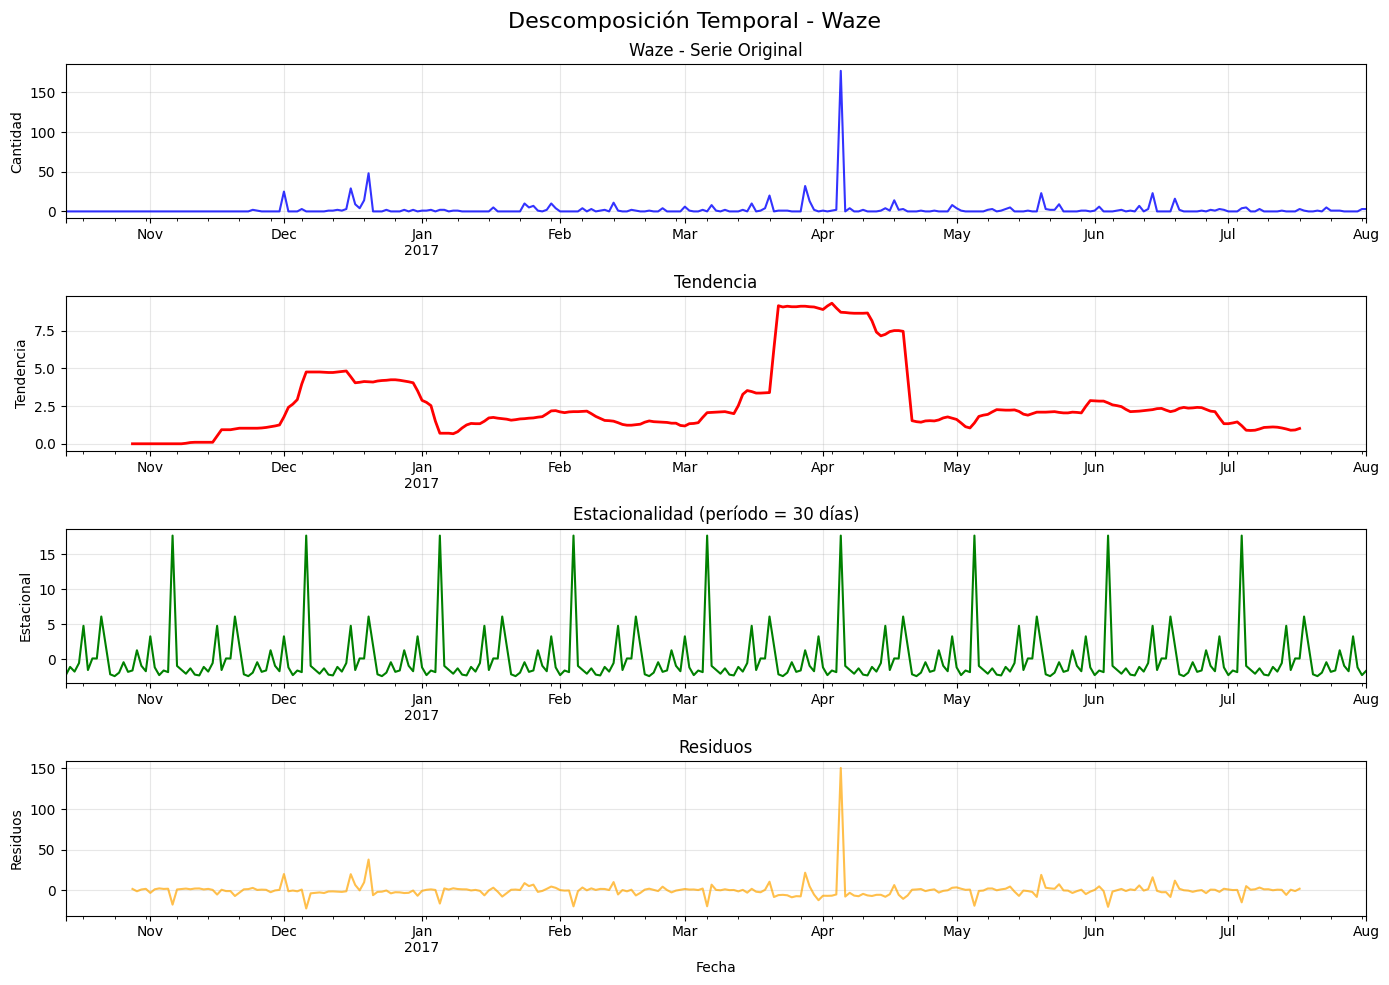

   ✅ Procesado correctamente
   📊 Tendencia general: 📈 Creciente
   🔄 Amplitud estacional: 20.1 unidades
   💡 RECOMENDACIONES:
      • Serie original estacionaria → Apta para modelado directo
      • Residuos estacionarios → Buena descomposición
      • Serie diferenciada estacionaria → Diferenciación adecuada

🎉 Análisis completado!

💡 CONFIGURACIÓN USADA:
   • Período estacional: 30 días (mensual)
   • Modelo: additive
   • Relleno: 0s en días sin ventas (solo rango activo por categoría)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as tsa_seasonal
from statsmodels.tsa.stattools import adfuller

# CONFIGURACIÓN ESTÁNDAR
PERIOD = 30  # Estacionalidad mensual para todas las categorías
MODEL = 'additive'  # Modelo consistente
MIN_ACTIVE_DAYS = 30  # Mínimo de días con ventas para procesar

# Función para test de estacionariedad
def adf_test(timeseries, title=''):
    """
    Realiza el test de Dickey-Fuller Aumentado
    H0: La serie tiene raíz unitaria (no es estacionaria)
    H1: La serie es estacionaria
    """
    print(f'   📊 Test ADF para {title}:')
    
    # Eliminar valores NaN
    clean_series = timeseries.dropna()
    if len(clean_series) == 0:
        print("   ❌ No hay datos válidos para el test")
        return None
    
    try:
        # Realizar el test
        dftest = adfuller(clean_series, autolag='AIC')
        
        # Interpretación rápida
        p_value = dftest[1]
        adf_stat = dftest[0]
        critical_1 = dftest[4]['1%']
        critical_5 = dftest[4]['5%']
        
        if p_value <= 0.05:
            result = "✅ ESTACIONARIA"
            interpretation = f"p-value ({p_value:.4f}) <= 0.05"
        else:
            result = "❌ NO ESTACIONARIA"
            interpretation = f"p-value ({p_value:.4f}) > 0.05"
        
        print(f"      {result} | ADF: {adf_stat:.3f} | Critical 5%: {critical_5:.3f} | {interpretation}")
        return {'is_stationary': p_value <= 0.05, 'p_value': p_value, 'adf_stat': adf_stat}
        
    except Exception as e:
        print(f"   ❌ Error en test ADF: {e}")
        return None

print("📊 RESUMEN INICIAL:")
print(f"Rango de fechas: {df['transaction_date'].min()} a {df['transaction_date'].max()}")
print(f"Total de días únicos: {df['transaction_date'].nunique()}")
print(f"Total de transacciones: {len(df)}")

# PASO 1: Ver qué categorías tienes
print(f"\nCategorías disponibles:")
category_stats = df['product_category'].value_counts()
print(category_stats)

# PASO 2: Análisis de actividad por categoría
print(f"\n--- ANÁLISIS DE ACTIVIDAD ---")
categories = df['product_category'].unique()

for category in categories:
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Contar días únicos con ventas
    active_days = df_category['transaction_date'].nunique()
    total_transactions = len(df_category)
    
    # Rango de fechas de esta categoría
    start_date = df_category['transaction_date'].min()
    end_date = df_category['transaction_date'].max()
    potential_days = (end_date - start_date).days + 1
    activity_rate = (active_days / potential_days) * 100
    
    print(f"{category:20} | Días activos: {active_days:3d} | Rango: {potential_days:3d} días | Actividad: {activity_rate:5.1f}% | Transacciones: {total_transactions}")

# PASO 3: Descomposición con relleno inteligente
print(f"\n--- DESCOMPOSICIÓN (período={PERIOD} días) ---")

for category in categories:
    print(f"\n🔄 Procesando: {category}")
    
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar actividad mínima
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        print(f"   ❌ Insuficiente actividad ({active_days} días activos < {MIN_ACTIVE_DAYS}). Saltando...")
        continue
    
    # Agrupar por fecha (sumar cantidades del mismo día)
    ts_data = df_category.groupby('transaction_date')['product_quantity'].sum()
    
    # RELLENO INTELIGENTE: Solo en el rango activo de esta categoría
    start_date = ts_data.index.min()
    end_date = ts_data.index.max()
    full_date_range = pd.date_range(start_date, end_date, freq='D')
    
    # Crear serie temporal completa con 0s en días sin ventas
    ts = ts_data.reindex(full_date_range, fill_value=0)
    
    total_days = len(ts)
    zero_days = (ts == 0).sum()
    
    print(f"   📅 Rango: {start_date.date()} a {end_date.date()} ({total_days} días)")
    print(f"   📈 Días con ventas: {total_days - zero_days} | Días sin ventas: {zero_days}")
    
    # Verificar que hay suficientes datos para el período elegido
    if total_days < 2 * PERIOD:
        print(f"   ⚠️  Advertencia: Solo {total_days} días para período de {PERIOD}. Continuando...")
    
    # TEST DE ESTACIONARIEDAD
    print(f"   🔬 TESTS DE ESTACIONARIEDAD:")
    adf_original = adf_test(ts, 'Serie Original')
    
    # Descomponer
    try:
        decomposition = tsa_seasonal.seasonal_decompose(ts, period=PERIOD, model=MODEL)
        
        # Tests adicionales en componentes
        adf_trend = adf_test(decomposition.trend, 'Tendencia')
        adf_residual = adf_test(decomposition.resid, 'Residuos')
        adf_diff = adf_test(ts.diff().dropna(), 'Diferenciada 1ra')
        
        # Visualizar
        fig, axes = plt.subplots(4, 1, figsize=(14, 10))
        
        # Serie original
        ts.plot(ax=axes[0], title=f'{category} - Serie Original', color='blue', alpha=0.8)
        axes[0].set_ylabel('Cantidad')
        axes[0].grid(True, alpha=0.3)
        
        # Tendencia
        decomposition.trend.plot(ax=axes[1], title='Tendencia', color='red', linewidth=2)
        axes[1].set_ylabel('Tendencia')
        axes[1].grid(True, alpha=0.3)
        
        # Estacionalidad
        decomposition.seasonal.plot(ax=axes[2], title=f'Estacionalidad (período = {PERIOD} días)', color='green')
        axes[2].set_ylabel('Estacional')
        axes[2].grid(True, alpha=0.3)
        
        # Residuos
        decomposition.resid.plot(ax=axes[3], title='Residuos', color='orange', alpha=0.7)
        axes[3].set_ylabel('Residuos')
        axes[3].set_xlabel('Fecha')
        axes[3].grid(True, alpha=0.3)
        
        plt.suptitle(f'Descomposición Temporal - {category}', size=16, y=0.98)
        plt.tight_layout()
        plt.show()
        
        # Estadísticas adicionales
        trend_slope = decomposition.trend.dropna().iloc[-1] - decomposition.trend.dropna().iloc[0]
        seasonal_amplitude = decomposition.seasonal.max() - decomposition.seasonal.min()
        
        print(f"   ✅ Procesado correctamente")
        print(f"   📊 Tendencia general: {'📈 Creciente' if trend_slope > 0 else '📉 Decreciente' if trend_slope < 0 else '➡️  Estable'}")
        print(f"   🔄 Amplitud estacional: {seasonal_amplitude:.1f} unidades")
        
        # RECOMENDACIONES BASADAS EN ESTACIONARIEDAD
        print(f"   💡 RECOMENDACIONES:")
        if adf_original and not adf_original['is_stationary']:
            print(f"      • Serie original NO estacionaria → Considera diferenciación")
            print(f"      • Para predicción: Usa modelos ARIMA con diferenciación")
        else:
            print(f"      • Serie original estacionaria → Apta para modelado directo")
        
        if adf_residual and adf_residual['is_stationary']:
            print(f"      • Residuos estacionarios → Buena descomposición")
        elif adf_residual:
            print(f"      • Residuos NO estacionarios → Revisa modelo o período")

        if adf_diff and not adf_diff['is_stationary']:
            print(f"      • Serie diferenciada NO estacionaria → Podría necesitar más diferenciación o transformación")
        elif adf_diff:
            print(f"      • Serie diferenciada estacionaria → Diferenciación adecuada")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

print("\n🎉 Análisis completado!")
print(f"\n💡 CONFIGURACIÓN USADA:")
print(f"   • Período estacional: {PERIOD} días ({'mensual' if PERIOD == 30 else 'semanal' if PERIOD == 7 else 'personalizado'})")
print(f"   • Modelo: {MODEL}")
print(f"   • Relleno: 0s en días sin ventas (solo rango activo por categoría)")

<Figure size 1200x600 with 0 Axes>

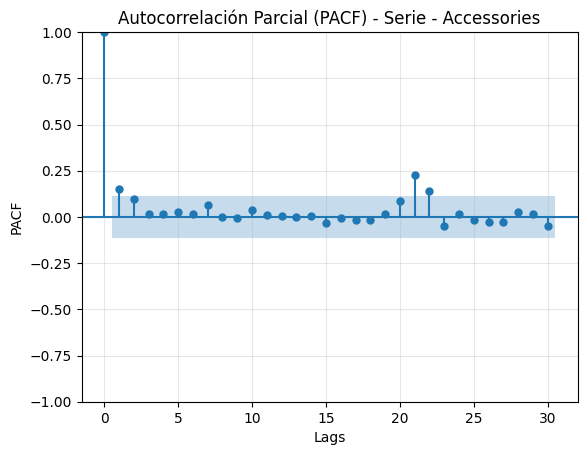

<Figure size 1200x600 with 0 Axes>

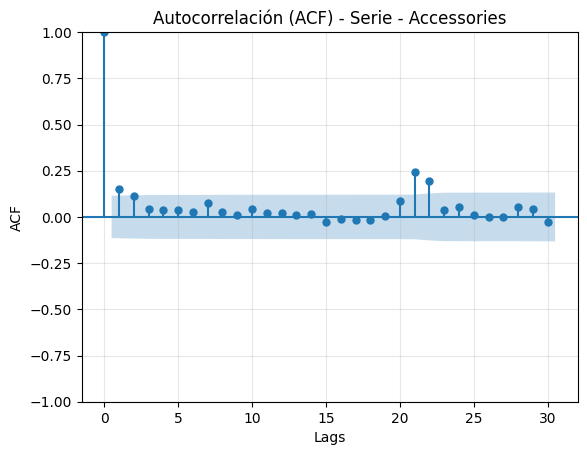

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# CONFIGURACIÓN
MIN_ACTIVE_DAYS = 100  # Mínimo de días para modelar
TRAIN_SPLIT = 0.8      # 80% para entrenamiento, 20% para prueba

def preparar_serie_categoria(df, category):
    """
    Prepara la serie temporal para una categoría específica
    """
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar datos suficientes
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        return None, f"Pocos datos: {active_days} días"
    
    # Agrupar por fecha y sumar cantidades
    ts_data = df_category.groupby('transaction_date')['product_quantity'].sum()
    
    # Relleno inteligente (solo rango activo)
    start_date = ts_data.index.min()
    end_date = ts_data.index.max()
    full_date_range = pd.date_range(start_date, end_date, freq='D')
    ts = ts_data.reindex(full_date_range, fill_value=0)
    
    return ts, "OK"

# Gráfico de Autocorrelación Parcial (PACF)
def grafico_pacf(serie, lags=20, titulo=""):
    """
    Crea gráfico de autocorrelación parcial
    """
    plt.figure(figsize=(12, 6))
    plot_pacf(serie, lags=lags, alpha=0.05, method='ywm')
    plt.title(f'Autocorrelación Parcial (PACF) - {titulo}')
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.grid(True, alpha=0.3)
    plt.show()

# Gráfico de Autocorrelación (ACF)
def grafico_acf(serie, lags=20, titulo=""):
    """
    Crea gráfico de autocorrelación
    """
    plt.figure(figsize=(12, 6))
    plot_acf(serie, lags=lags, alpha=0.05)
    plt.title(f'Autocorrelación (ACF) - {titulo}')
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.grid(True, alpha=0.3)
    plt.show()

# Usar las funciones
dts, mensaje = preparar_serie_categoria(df, 'Accessories')
grafico_pacf(dts, lags=30, titulo="Serie - Accessories")
grafico_acf(dts, lags=30, titulo="Serie - Accessories")

<Figure size 1200x600 with 0 Axes>

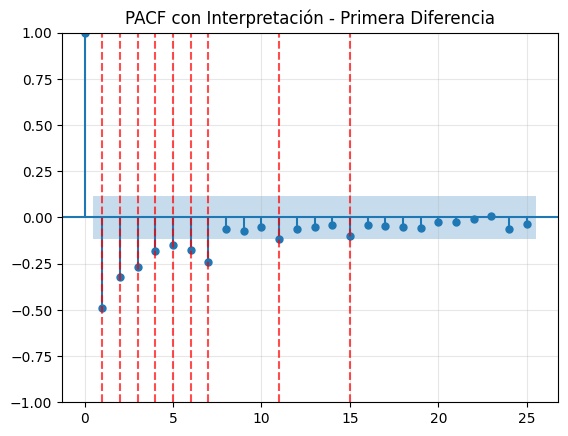

📊 INTERPRETACIÓN PACF - Primera Diferencia
Lags significativos: [1, 2, 3, 4, 5, 6, 7, 11, 15]
Orden AR sugerido (p): 15


In [31]:
from statsmodels.tsa.stattools import pacf, acf

def pacf_con_interpretacion(serie, lags=20, titulo=""):
    """
    PACF con interpretación automática para determinar orden AR
    """
    # Calcular PACF
    pacf_values, confint = pacf(serie, nlags=lags, alpha=0.05)
    
    # Encontrar lags significativos
    lags_significativos = []
    for i in range(1, len(pacf_values)):
        if abs(pacf_values[i]) > abs(confint[i, 1] - pacf_values[i]):
            lags_significativos.append(i)
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plot_pacf(serie, lags=lags, alpha=0.05, method='ywm')
    plt.title(f'PACF con Interpretación - {titulo}')
    plt.grid(True, alpha=0.3)
    
    # Marcar lags significativos
    for lag in lags_significativos:
        plt.axvline(x=lag, color='red', linestyle='--', alpha=0.7)
    
    plt.show()
    
    # Interpretación
    print(f"📊 INTERPRETACIÓN PACF - {titulo}")
    print("="*50)
    print(f"Lags significativos: {lags_significativos}")
    
    if len(lags_significativos) > 0:
        p_sugerido = max(lags_significativos)
        print(f"Orden AR sugerido (p): {p_sugerido}")
    else:
        print("No se detectaron lags significativos")
        print("Orden AR sugerido (p): 0")
    
    return lags_significativos

# Usar con interpretación
lags_sig = pacf_con_interpretacion(ts.diff().dropna(), lags=25, titulo="Primera Diferencia")

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# CONFIGURACIÓN
MIN_ACTIVE_DAYS = 100  # Mínimo de días para modelar
TRAIN_SPLIT = 0.8      # 80% para entrenamiento, 20% para prueba

def preparar_serie_categoria(df, category):
    """
    Prepara la serie temporal para una categoría específica
    """
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar datos suficientes
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        return None, f"Pocos datos: {active_days} días"
    
    # Agrupar por fecha y sumar cantidades
    ts_data = df_category.groupby('transaction_date')['product_quantity'].sum()
    
    # Relleno inteligente (solo rango activo)
    start_date = ts_data.index.min()
    end_date = ts_data.index.max()
    full_date_range = pd.date_range(start_date, end_date, freq='D')
    ts = ts_data.reindex(full_date_range, fill_value=0)
    
    return ts, "OK"

def encontrar_mejor_arima(ts, max_p=3, max_d=2, max_q=3):
    """
    Busca los mejores parámetros ARIMA usando AIC
    """
    import random
    search_id = random.randint(1000, 9999)
    print(f"   🔍 Buscando mejores parámetros ARIMA... [ID: {search_id}]")
    
    mejor_aic = float('inf')
    mejor_orden = None
    mejor_modelo = None
    resultados = []
    
    for p in range(0, max_p + 1):
        for d in range(0, max_d + 1):
            for q in range(0, max_q + 1):
                try:
                    modelo = ARIMA(ts, order=(p, d, q))
                    modelo_ajustado = modelo.fit()
                    
                    aic = modelo_ajustado.aic
                    resultados.append({
                        'orden': (p, d, q),
                        'aic': aic,
                        'bic': modelo_ajustado.bic
                    })
                    
                    if aic < mejor_aic:
                        mejor_aic = aic
                        mejor_orden = (p, d, q)
                        mejor_modelo = modelo_ajustado
                        
                except Exception as e:
                    continue
    
    # SOLO reportar que se encontró, SIN métricas
    if mejor_modelo:
        print(f"   ✅ Modelo óptimo encontrado: ARIMA{mejor_orden} [ID: {search_id}]")
    else:
        print(f"   ❌ No se encontró modelo válido [ID: {search_id}]")
    
    return mejor_modelo, mejor_orden, resultados

def crear_modelo_arima(serie, orden=(1,1,1)):
    """
    Crea y ajusta un modelo ARIMA
    orden = (p, d, q) donde:
    p = orden AR (autoregresivo)
    d = orden de diferenciación
    q = orden MA (media móvil)
    """

    resultados = []

    print(f"🔧 Creando modelo ARIMA{orden}")
    
    # Crear el modelo
    modelo = ARIMA(serie, order=orden)
    
    # Ajustar el modelo
    modelo_ajustado = modelo.fit()

    resultados.append({
        'orden': orden,
        'aic': modelo_ajustado.aic,
        'bic': modelo_ajustado.bic
    })
    
    # Mostrar resumen
    print(modelo_ajustado.summary())
    
    return modelo_ajustado, orden, resultados

def evaluar_modelo(modelo, ts_test, ts_train, pasos_forecast):
    """
    Evalúa el modelo ARIMA con métricas de error
    """
    try:
        # Predicción
        forecast = modelo.forecast(steps=pasos_forecast)
        
        # Calcular errores solo donde hay datos de prueba
        min_len = min(len(forecast), len(ts_test))
        forecast_eval = forecast[:min_len]
        test_eval = ts_test[:min_len]
        
        # Métricas de error
        mae = mean_absolute_error(test_eval, forecast_eval)
        rmse = np.sqrt(mean_squared_error(test_eval, forecast_eval))
        mape = np.mean(np.abs((test_eval - forecast_eval) / (test_eval + 1))) * 100  # +1 evita división por 0
        
        return {
            'forecast': forecast,
            'mae': mae,
            'rmse': rmse,
            'mape': mape
        }
    except Exception as e:
        return {'error': str(e)}

def crear_modelo_arima_categoria(df, category, show_graphs=True, auto_arima=True, orden_manual=(1,1,1)):
    """
    Crea modelo ARIMA para una categoría específica
    """
    import random
    exec_id = random.randint(1000, 9999)
    print(f"\n🚀 MODELANDO CATEGORÍA: {category} [ID: {exec_id}]")
    print("-" * 50)
    
    # Preparar datos
    ts, status = preparar_serie_categoria(df, category)
    if ts is None:
        print(f"   ❌ {status}")
        return None
    
    print(f"   📊 Datos: {len(ts)} días ({ts.index.min().date()} a {ts.index.max().date()})")
    
    # Dividir en entrenamiento y prueba
    split_index = int(len(ts) * TRAIN_SPLIT)
    ts_train = ts.iloc[:split_index]
    ts_test = ts.iloc[split_index:]
    
    print(f"   📚 Entrenamiento: {len(ts_train)} días | 🧪 Prueba: {len(ts_test)} días")
    
    # Encontrar mejor modelo o usar manual
    if auto_arima:
        modelo, mejor_orden, todos_resultados = encontrar_mejor_arima(ts_train)
        if modelo is None:
            print("   ❌ No se pudo crear modelo")
            return None
    else:
        print(f"   🔧 Usando orden manual: ARIMA{orden_manual}")
        try:
            modelo_arima = ARIMA(ts_train, order=orden_manual)
            modelo = modelo_arima.fit()
            mejor_orden = orden_manual
        except Exception as e:
            print(f"   ❌ Error con orden manual: {e}")
            return None
    
    # Evaluar modelo
    evaluacion = evaluar_modelo(modelo, ts_test, ts_train, len(ts_test))
    
    if 'error' in evaluacion:
        print(f"   ❌ Error en evaluación: {evaluacion['error']}")
        return None
    
    # Mostrar resultados - UNA SOLA VEZ
    print(f"   📈 MÉTRICAS DE EVALUACIÓN [ID: {exec_id}]:")
    print(f"      • Modelo: ARIMA{mejor_orden}")
    print(f"      • AIC: {modelo.aic:.2f}")
    print(f"      • MAE: {evaluacion['mae']:.2f}")
    print(f"      • RMSE: {evaluacion['rmse']:.2f}")
    print(f"      • MAPE: {evaluacion['mape']:.2f}%")
    
    # Visualizar
    if show_graphs:
        plt.figure(figsize=(14, 8))
        
        # Plot 1: Serie completa con predicción
        plt.subplot(2, 2, 1)
        ts_train.plot(label='Entrenamiento', alpha=0.8)
        ts_test.plot(label='Datos Reales', color='green', alpha=0.8)
        
        # Agregar predicción
        forecast_index = pd.date_range(start=ts_test.index[0], periods=len(evaluacion['forecast']), freq='D')
        pd.Series(evaluacion['forecast'], index=forecast_index).plot(label='Predicción', color='red', linestyle='--')
        
        plt.title(f'{category} - ARIMA{mejor_orden}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Residuos
        plt.subplot(2, 2, 2)
        residuos = modelo.resid
        residuos.plot(title='Residuos del Modelo', alpha=0.7)
        plt.grid(True, alpha=0.3)
        
        # Plot 3: ACF de residuos
        plt.subplot(2, 2, 3)
        plot_acf(residuos.dropna(), ax=plt.gca(), title='ACF Residuos', lags=20)
        
        # Plot 4: Distribución de residuos
        plt.subplot(2, 2, 4)
        residuos.hist(bins=20, alpha=0.7)
        plt.title('Distribución de Residuos')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()
    else:
        residuos = modelo.resid

    
    # Test de autocorrelación de residuos (Ljung-Box)
    try:
        ljung_box = acorr_ljungbox(residuos.dropna(), lags=10, return_df=True)
        p_value_min = ljung_box['lb_pvalue'].min()
        
        if p_value_min > 0.05:
            print(f"   ✅ Test Ljung-Box: p-value mínimo = {p_value_min:.4f} > 0.05 (Residuos OK)")
        else:
            print(f"   ⚠️  Test Ljung-Box: p-value mínimo = {p_value_min:.4f} <= 0.05 (Posible autocorrelación)")
    except:
        print(f"   ⚠️  No se pudo realizar test Ljung-Box")
    
    return {
        'modelo': modelo,
        'orden': mejor_orden,
        'evaluacion': evaluacion,
        'ts_train': ts_train,
        'ts_test': ts_test,
        'category': category
    }

def analizar_todas_categorias(df, auto_arima=True, categorias_especificas=None):
    """
    Ejecuta análisis ARIMA para todas las categorías
    """
    print("🎯 INICIANDO ANÁLISIS ARIMA MULTI-CATEGORÍA")
    print("=" * 60)
    
    # Determinar qué categorías analizar
    if categorias_especificas:
        categories = categorias_especificas
    else:
        # Solo categorías con suficientes datos
        categories = []
        for cat in df['product_category'].unique():
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            if active_days >= MIN_ACTIVE_DAYS:
                categories.append(cat)
        
        print(f"📋 Categorías con suficientes datos ({MIN_ACTIVE_DAYS}+ días): {len(categories)}")
        for cat in categories:
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            print(f"   • {cat}: {active_days} días")
    
    # Ejecutar análisis
    resultados = {}
    
    for category in categories:
        resultado = crear_modelo_arima_categoria(df, category, False, auto_arima=auto_arima)
        if resultado:
            resultados[category] = resultado
    
    # Resumen final
    print(f"\n📊 RESUMEN FINAL:")
    print("=" * 60)
    print(f"Categorías procesadas exitosamente: {len(resultados)}")
    
    if resultados:
        # Ranking por MAPE
        ranking = sorted(resultados.items(), key=lambda x: x[1]['evaluacion']['mape'])
        
        print(f"\n🏆 RANKING POR PRECISIÓN (MAPE):")
        for i, (cat, res) in enumerate(ranking, 1):
            mape = res['evaluacion']['mape']
            orden = res['orden']
            print(f"{i:2d}. {cat:20} | ARIMA{orden} | MAPE: {mape:6.2f}%")
    
    return resultados

print("🎉 Código ARIMA multi-categoría listo para usar!")
print("\nEjemplos de uso:")
print("1. resultados = analizar_todas_categorias(df)")
print("2. resultado = crear_modelo_arima_categoria(df, 'Electronics')")

🎉 Código ARIMA multi-categoría listo para usar!

Ejemplos de uso:
1. resultados = analizar_todas_categorias(df)
2. resultado = crear_modelo_arima_categoria(df, 'Electronics')


In [ ]:
resultados = analizar_todas_categorias(df)
resultados

# Prueba SOLO esto para verificar:
#resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=False, orden_manual=(1,0,1))
#resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=True)
# AIC: 1328.33

🎯 INICIANDO ANÁLISIS ARIMA MULTI-CATEGORÍA
📋 Categorías con suficientes datos (100+ días): 19
   • Accessories: 293 días
   • Android: 293 días
   • Apparel: 293 días
   • Backpacks: 293 días
   • Bags: 293 días
   • Bottles: 293 días
   • Drinkware: 293 días
   • Electronics: 293 días
   • Fun: 293 días
   • Gift Cards: 293 días
   • Google: 293 días
   • Headgear: 293 días
   • Housewares: 293 días
   • Lifestyle: 293 días
   • More Bags: 293 días
   • Notebooks & Journals: 293 días
   • Office: 293 días
   • Tumblers: 293 días
   • Waze: 293 días

🚀 MODELANDO CATEGORÍA: Accessories [ID: 2889]
--------------------------------------------------
   📊 Datos: 293 días (2016-10-13 a 2017-08-01)
   📚 Entrenamiento: 234 días | 🧪 Prueba: 59 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 1175]
   ✅ Modelo óptimo encontrado: ARIMA(0, 1, 3) [ID: 1175]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 2889]:
      • Modelo: ARIMA(0, 1, 3)
      • AIC: 1328.33
      • MAE: 1.03
      • RMSE: 5.31
      • MAP

KeyboardInterrupt: 